In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.metrics.cluster import adjusted_rand_score


from matplotlib.colors import ListedColormap

import warnings

warnings.filterwarnings('ignore')

sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=200)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
def DE(adata, obs_id, obs_id_test, ref):

    sc.tl.rank_genes_groups(adata, groupby=obs_id, groups=[obs_id_test], 
                                reference=ref, method='wilcoxon', pts=True)

    lfcs = adata.uns['rank_genes_groups']['logfoldchanges'].astype([(obs_id_test, '<f8')]).view('<f8') 

    l231_genes = adata.uns['rank_genes_groups']['pts']

    lfcs = []
    names = list(adata.uns['rank_genes_groups']['names'].astype([(obs_id_test, '<U50')]).view('<U50'))
    logfoldchanges = adata.uns['rank_genes_groups']['logfoldchanges'].astype([(obs_id_test, '<f8')]).view('<f8')
    for i in l231_genes.index:
        lfcs.append(logfoldchanges[names.index(i)])

    l231_genes['LF'] = lfcs

    #plt.hist(l231_genes[obs_id_test].values)

    l231_genes = l231_genes[l231_genes[obs_id_test]>0.2]

    return pd.Series(l231_genes['LF']).sort_values(ascending=False)

In [3]:

P8 = sc.read_h5ad(out_path + 'P8' + '_non_analyzed.h5ad')
P14 = sc.read_h5ad(out_path + 'P14' + '_non_analyzed.h5ad')
P17 = sc.read_h5ad(out_path + 'P17' + '_non_analyzed.h5ad')
P21 = sc.read_h5ad(out_path + 'P21' + '_non_analyzed.h5ad')
P28 = sc.read_h5ad(out_path + 'P28' + '_non_analyzed.h5ad')
P38 = sc.read_h5ad(out_path + 'P38' + '_non_analyzed.h5ad')

# Refine clustering

After naming types in each age object, use those type names to get improved subclass labels.

## P8

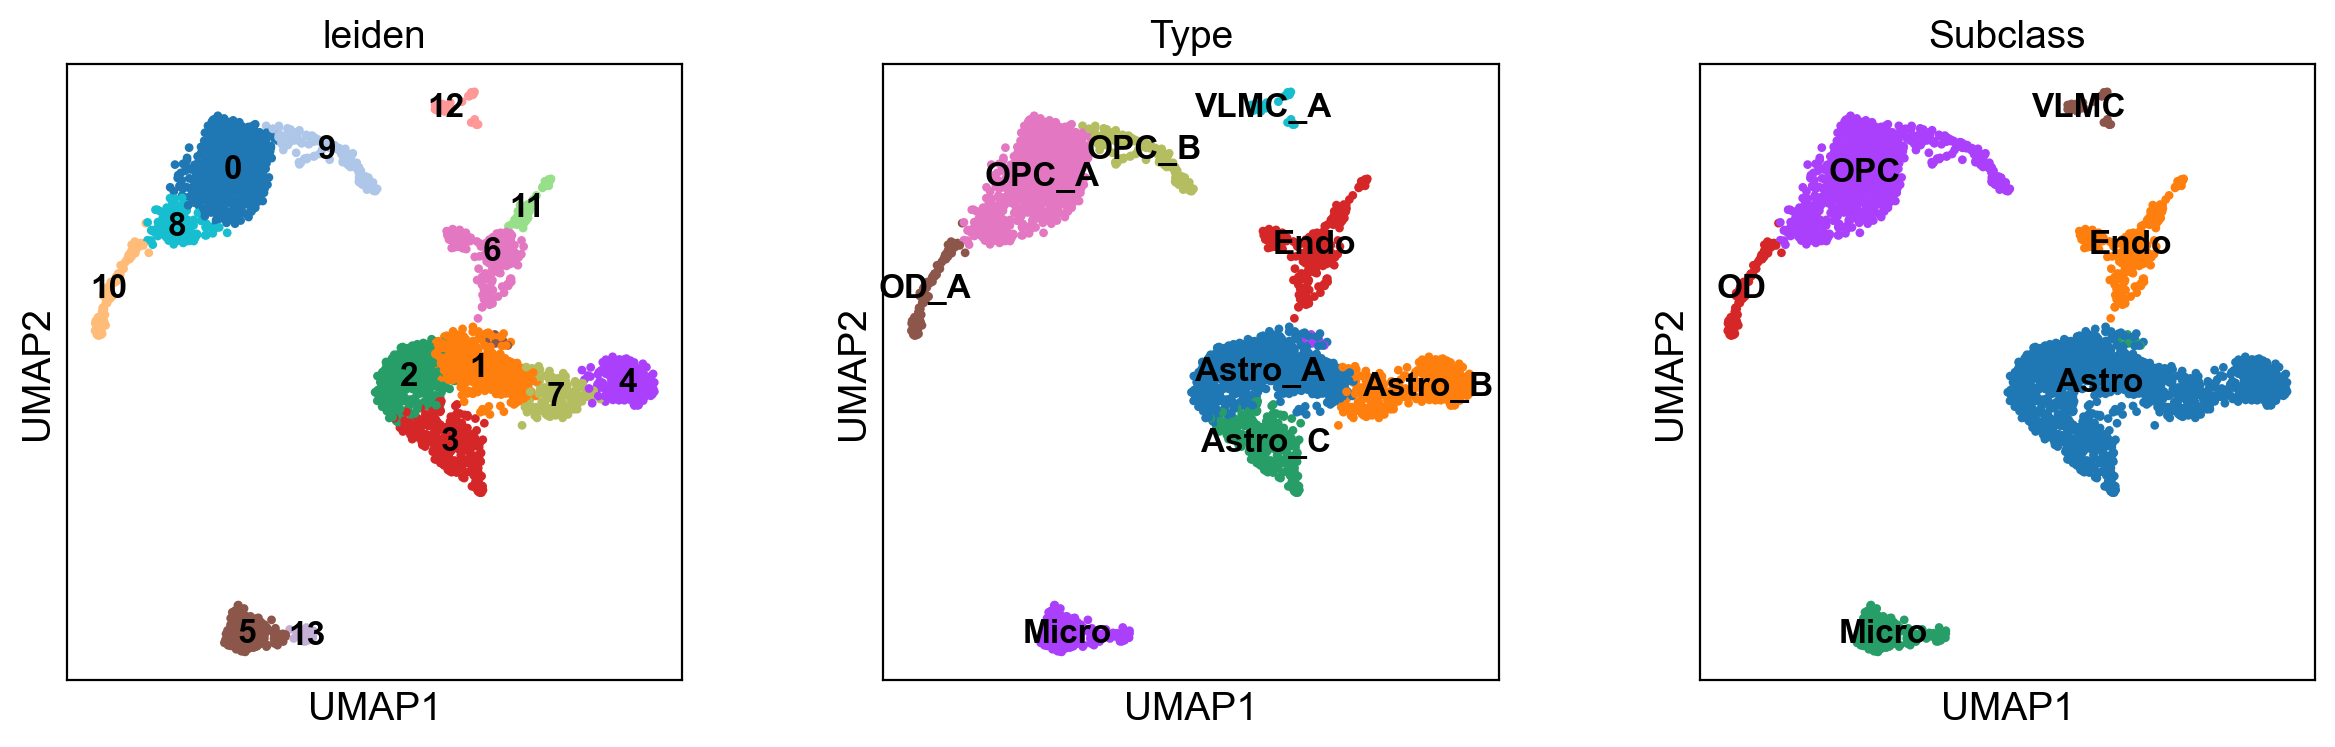

In [92]:
typesP8 = []
for i in P8.obs.leiden:
    
    if i in ('1', '2'): typesP8.append('Astro_A')
        
    elif i in ('3'): typesP8.append('Astro_C')
        
    elif i in ('4', '7'): typesP8.append('Astro_B')
        
    elif i in ('6', '11'): typesP8.append('Endo')
        
    elif i in ('5', '13'): typesP8.append('Micro')
        
    elif i in ('0', '8'): typesP8.append('OPC_A')

    elif i in ('9'): typesP8.append('OPC_B')

    elif i in ('10'): typesP8.append('OD_A')
        
    elif i in ('12'): typesP8.append('VLMC_A')    

P8.obs['Type'] = pd.Categorical(typesP8)

P8.obs['Subclass'] = P8.obs['Type']
P8.obs['Subclass'] = P8.obs['Subclass'].str.replace('_A','')
P8.obs['Subclass'] = P8.obs['Subclass'].str.replace('_B','')
P8.obs['Subclass'] = P8.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P8, color=['leiden', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## P14

... storing 'Subclass' as categorical


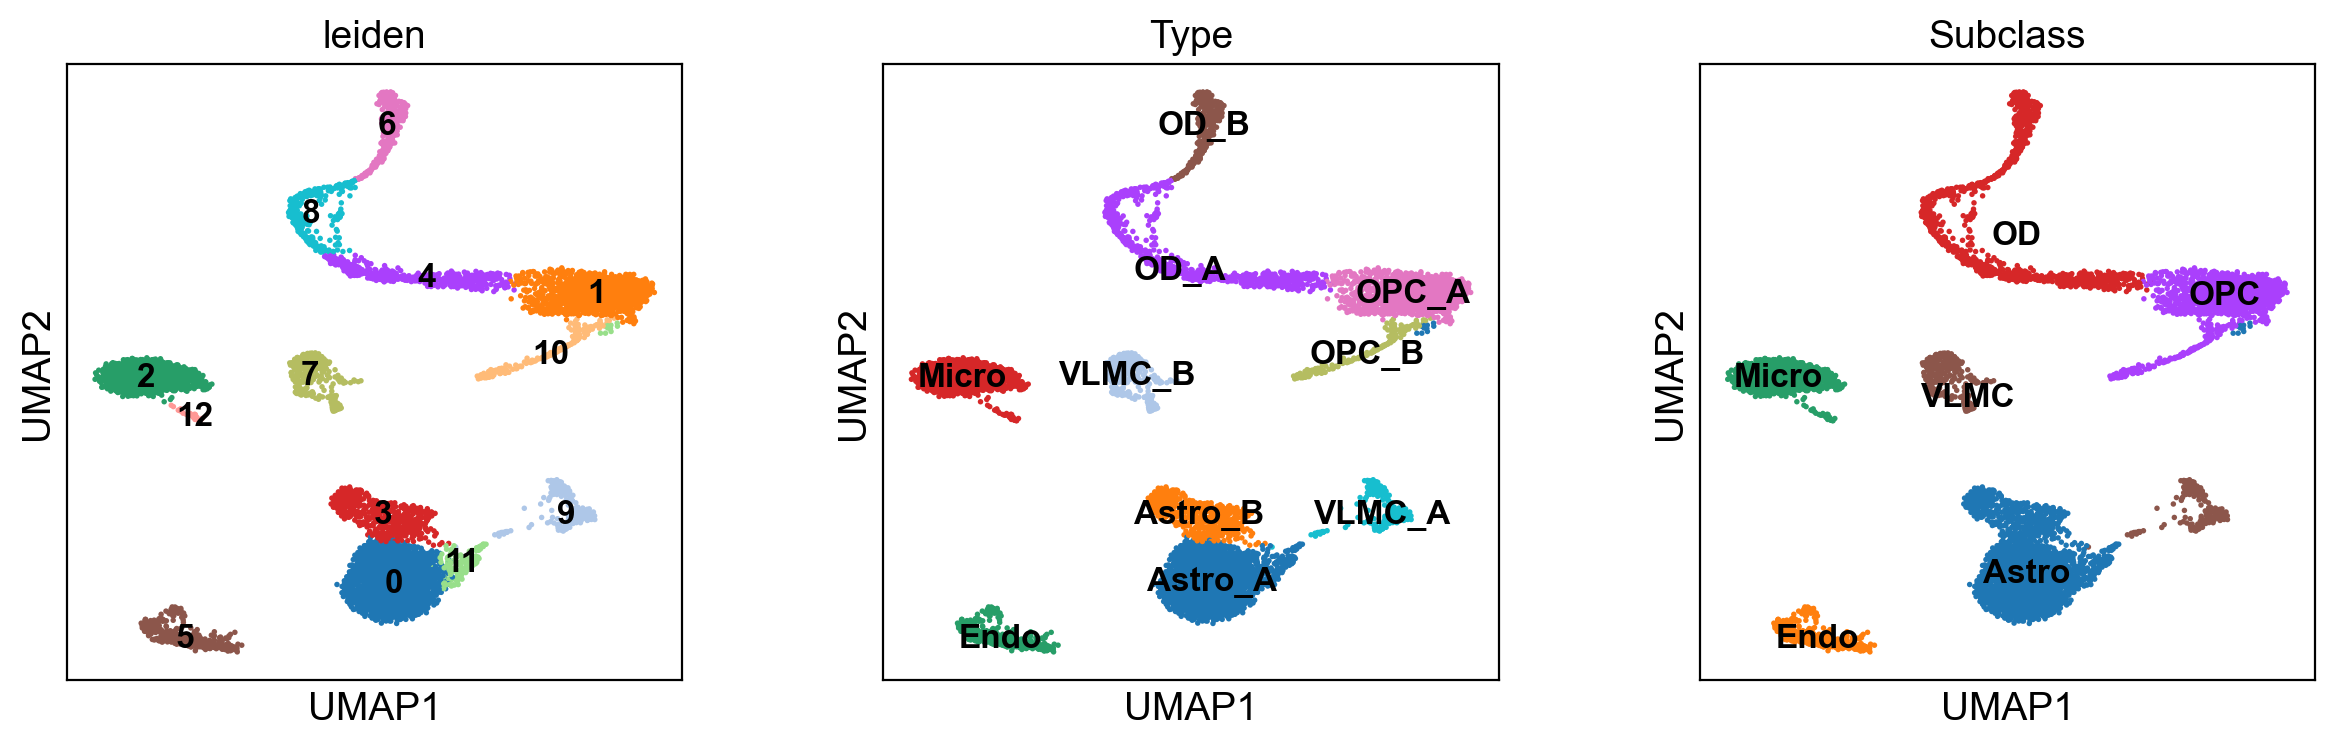

In [93]:
typesP14 = []
for i in P14.obs.leiden:
    
    if i in ('0', '11'): typesP14.append('Astro_A')
        
    elif i in ('3'): typesP14.append('Astro_B')
        
    elif i in ('5'): typesP14.append('Endo')
        
    elif i in ('2', '12'): typesP14.append('Micro')
        
    elif i in ('1'): typesP14.append('OPC_A')
        
    elif i in ('10'): typesP14.append('OPC_B')

    elif i in ('4', '8'): typesP14.append('OD_A')

    elif i in ('6'): typesP14.append('OD_B')
        
    elif i in ('9'): typesP14.append('VLMC_A')    
        
    elif i in ('7'): typesP14.append('VLMC_B')    


P14.obs['Type'] = pd.Categorical(typesP14)

P14.obs['Subclass'] = P14.obs['Type']
P14.obs['Subclass'] = P14.obs['Subclass'].str.replace('_A','')
P14.obs['Subclass'] = P14.obs['Subclass'].str.replace('_B','')
P14.obs['Subclass'] = P14.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P14, color=['leiden', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## P17

... storing 'Subclass' as categorical


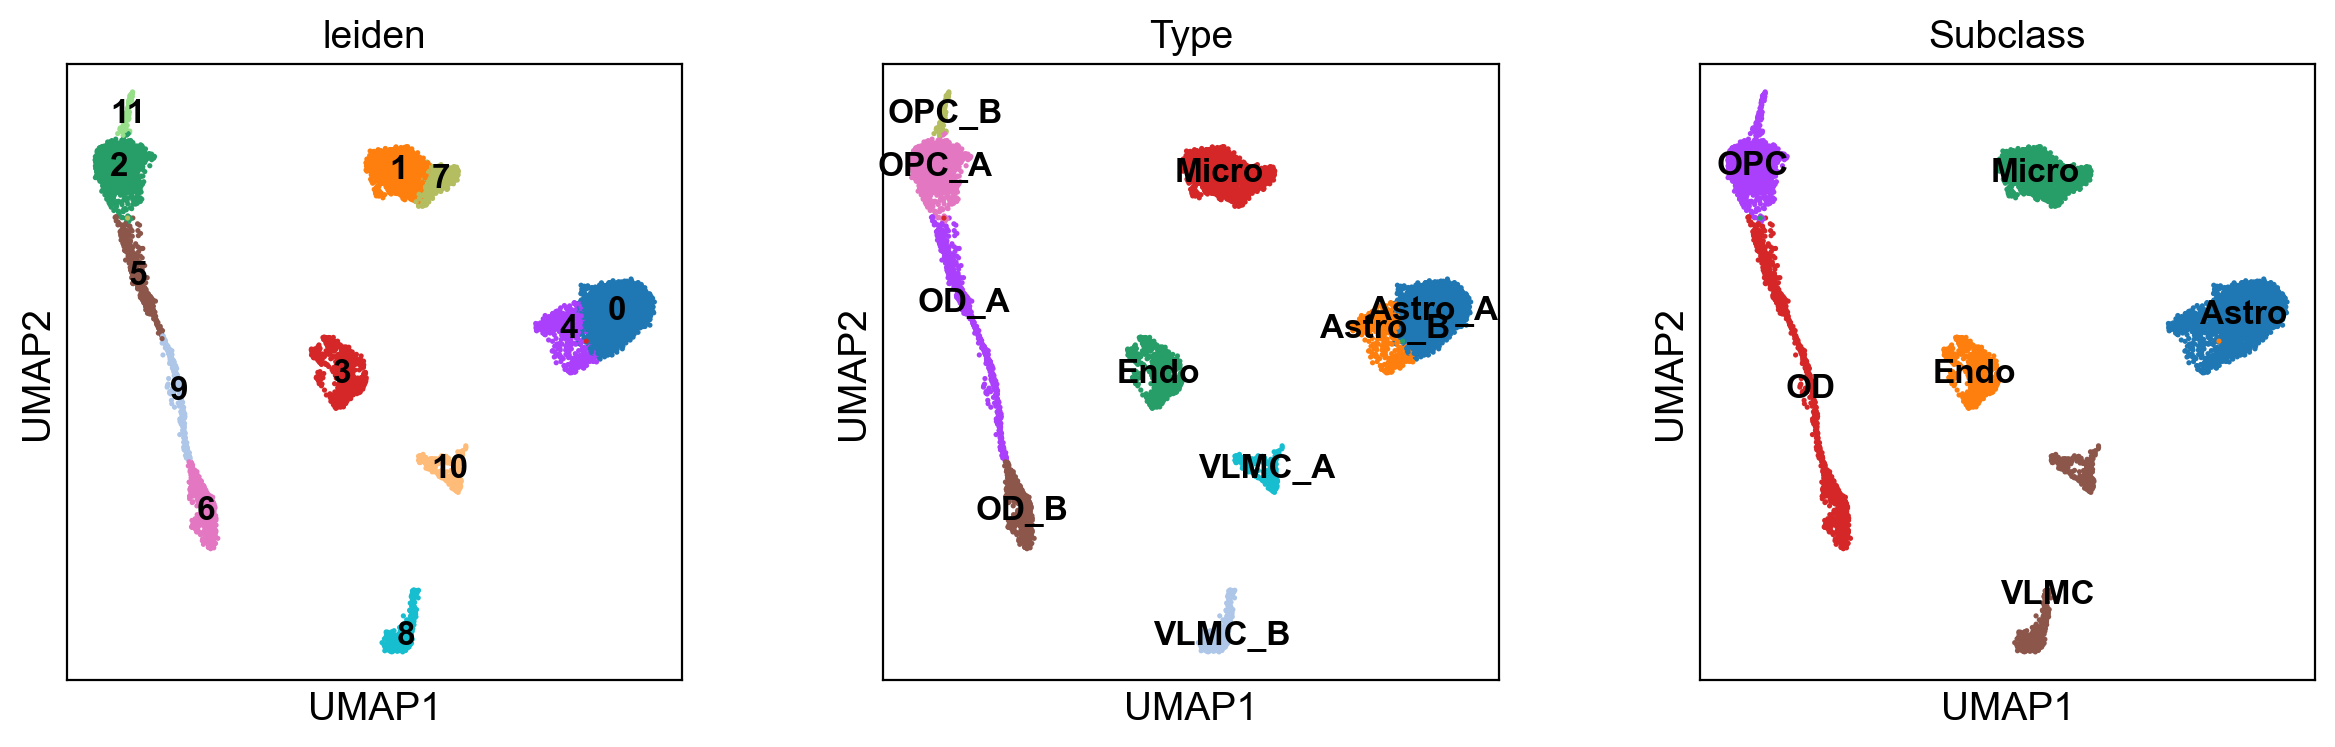

In [94]:
typesP17 = []
for i in P17.obs.leiden:
    
    if i in ('0'): typesP17.append('Astro_A')
        
    elif i in ('4'): typesP17.append('Astro_B')
        
    elif i in ('3'): typesP17.append('Endo')
        
    elif i in ('1', '7'): typesP17.append('Micro')
        
    elif i in ('2'): typesP17.append('OPC_A')
        
    elif i in ('11'): typesP17.append('OPC_B')

    elif i in ('5', '9'): typesP17.append('OD_A')

    elif i in ('6'): typesP17.append('OD_B')
        
    elif i in ('10'): typesP17.append('VLMC_A')    
        
    elif i in ('8'): typesP17.append('VLMC_B')    


P17.obs['Type'] = pd.Categorical(typesP17)

P17.obs['Subclass'] = P17.obs['Type']
P17.obs['Subclass'] = P17.obs['Subclass'].str.replace('_A','')
P17.obs['Subclass'] = P17.obs['Subclass'].str.replace('_B','')
P17.obs['Subclass'] = P17.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P17, color=['leiden', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## P21

... storing 'Subclass' as categorical


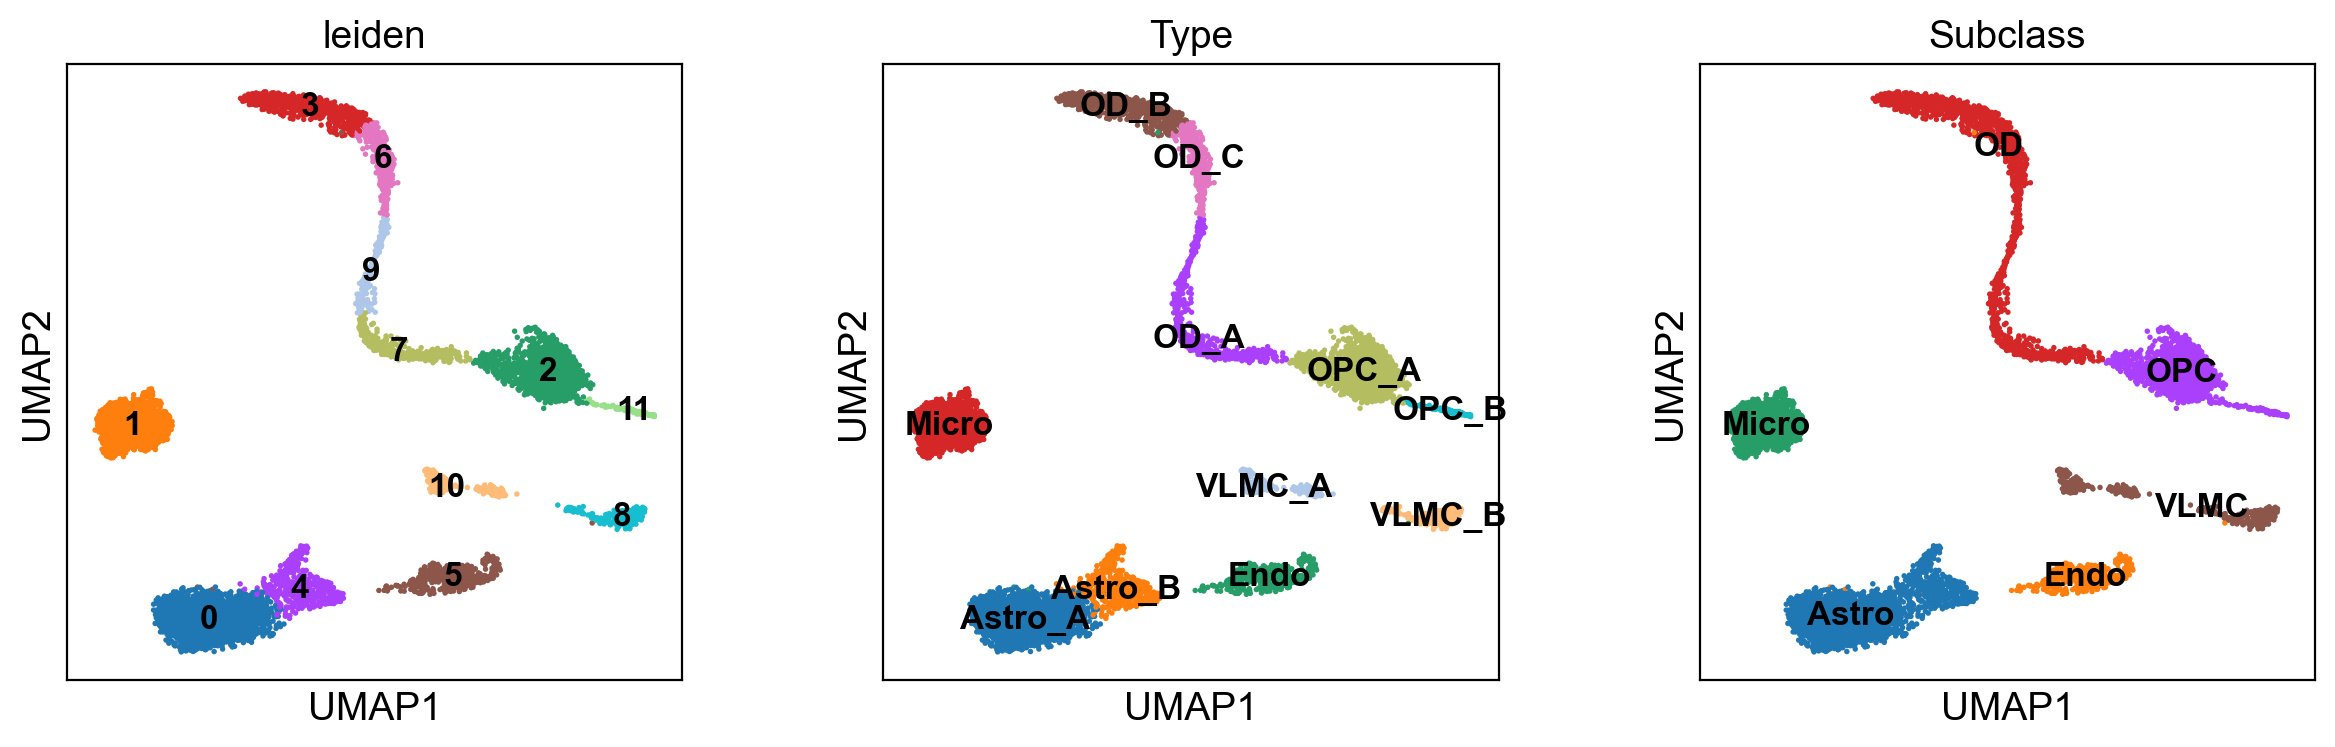

In [95]:
typesP21 = []
for i in P21.obs.leiden:
    
    if i in ('0'): typesP21.append('Astro_A')
        
    elif i in ('4'): typesP21.append('Astro_B')
        
    elif i in ('5'): typesP21.append('Endo')
        
    elif i in ('1'): typesP21.append('Micro')
        
    elif i in ('2'): typesP21.append('OPC_A')
        
    elif i in ('11'): typesP21.append('OPC_B')

    elif i in ('7', '9'): typesP21.append('OD_A')

    elif i in ('3'): typesP21.append('OD_B')
        
    elif i in ('6'): typesP21.append('OD_C')
        
    elif i in ('10'): typesP21.append('VLMC_A')    
        
    elif i in ('8'): typesP21.append('VLMC_B')    


P21.obs['Type'] = pd.Categorical(typesP21)

P21.obs['Subclass'] = P21.obs['Type']
P21.obs['Subclass'] = P21.obs['Subclass'].str.replace('_A','')
P21.obs['Subclass'] = P21.obs['Subclass'].str.replace('_B','')
P21.obs['Subclass'] = P21.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P21, color=['leiden', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## P28

... storing 'Subclass' as categorical


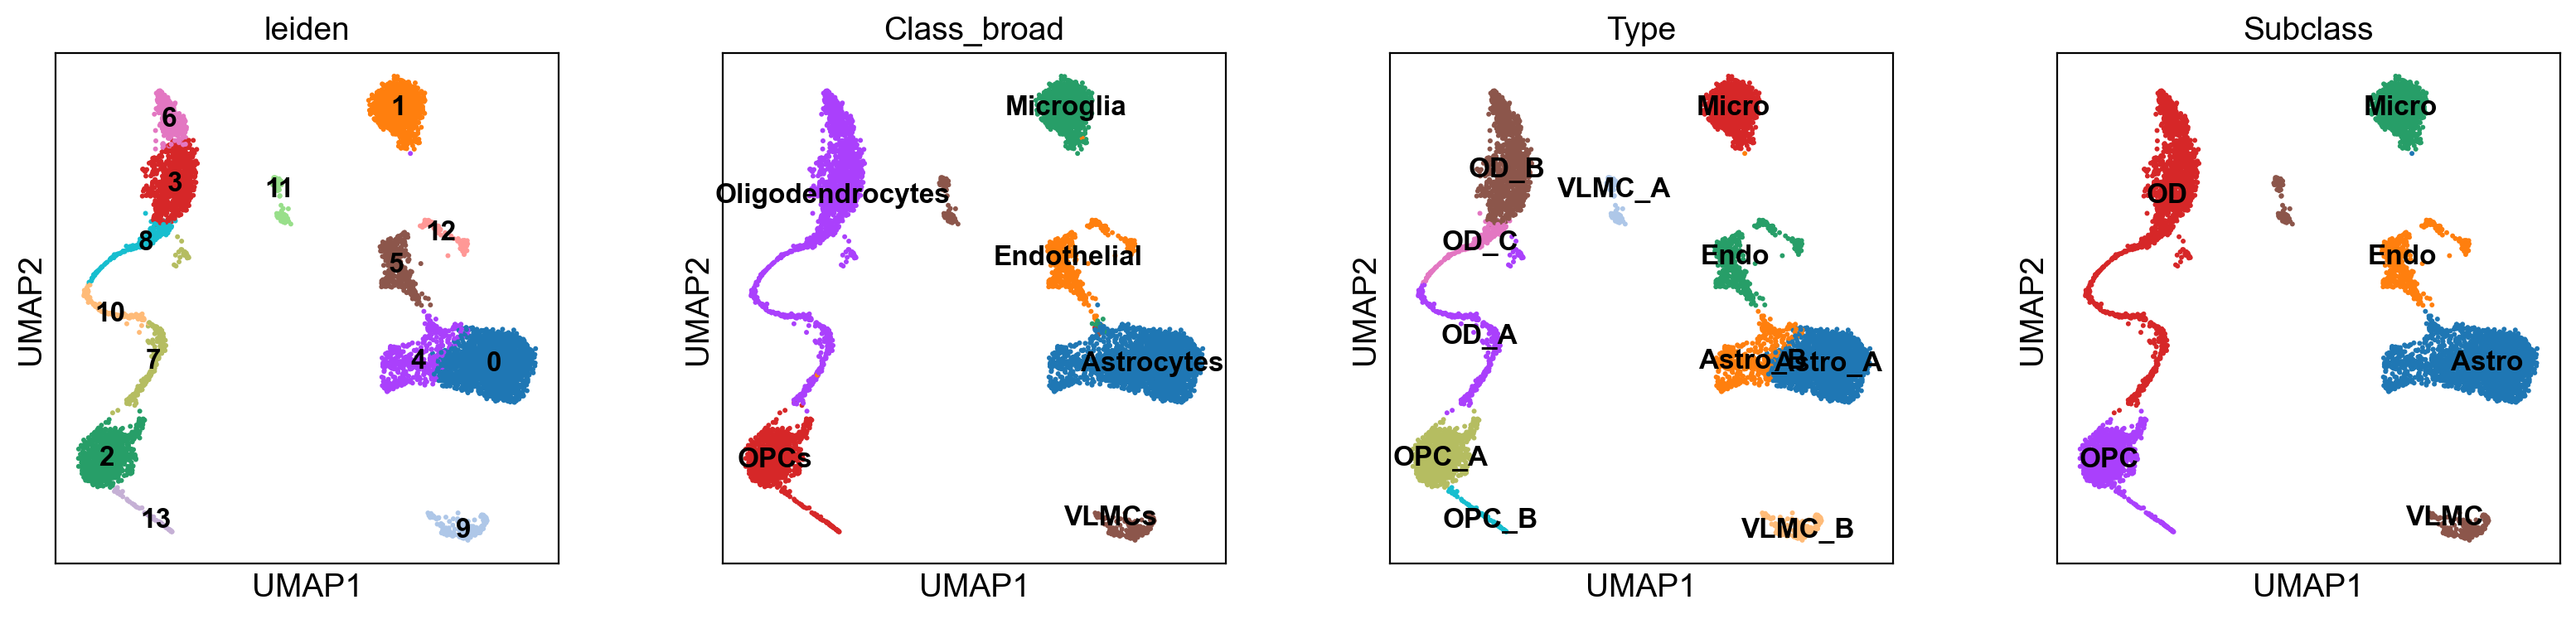

In [145]:
typesP28 = []
a = 0
for i in P28.obs.leiden:
    
    if i in ('0'): typesP28.append('Astro_A')
        
    elif i in ('4'): typesP28.append('Astro_B')
        
    elif i in ('5', '12'): typesP28.append('Endo')
        
    elif i in ('1'): typesP28.append('Micro')
        
    elif i in ('2'): typesP28.append('OPC_A')
        
    elif int(i) in [13]: 
        typesP28.append('OPC_B')
        a = a+1

    elif i in ('7', '10'): typesP28.append('OD_A')

    elif i in ('3'): typesP28.append('OD_B')
    
    elif i in ('6'): typesP28.append('OD_B')

        
    elif i in ('8'): typesP28.append('OD_C')
        
    elif i in ('11'): typesP28.append('VLMC_A')    
        
    elif i in ('9'): typesP28.append('VLMC_B')    


P28.obs['Type'] = pd.Categorical(typesP28)

P28.obs['Subclass'] = P28.obs['Type']
P28.obs['Subclass'] = P28.obs['Subclass'].str.replace('_A','')
P28.obs['Subclass'] = P28.obs['Subclass'].str.replace('_B','')
P28.obs['Subclass'] = P28.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P28, color=['leiden', 'Class_broad', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## P38

... storing 'Subclass' as categorical


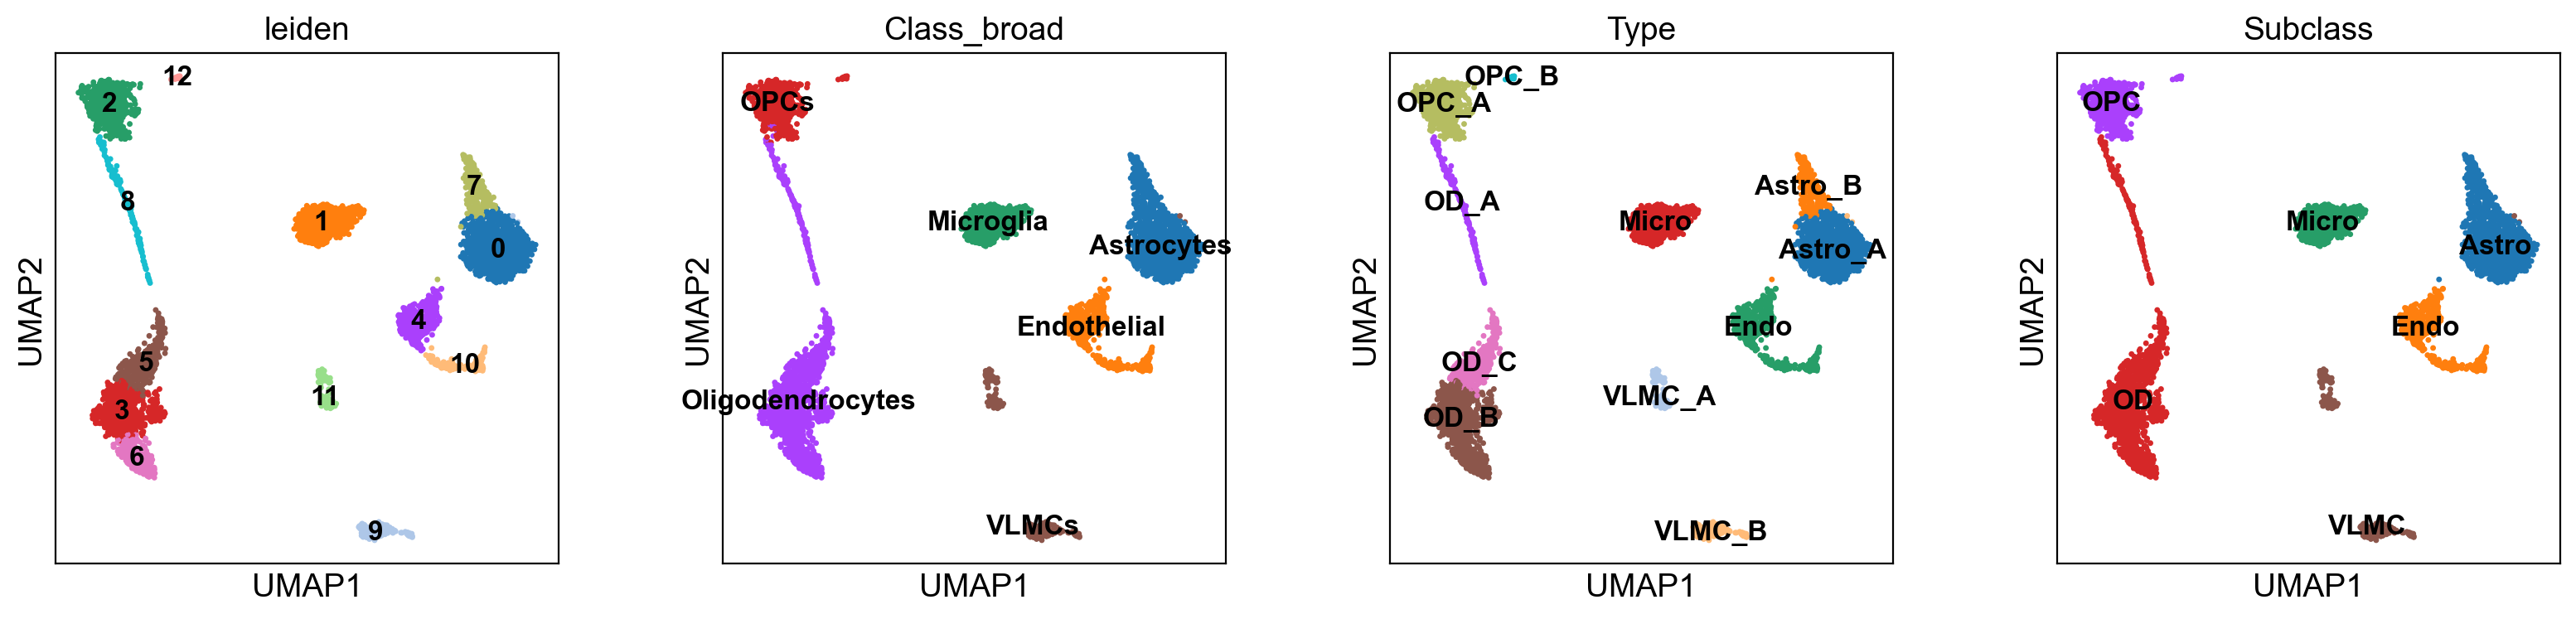

In [103]:
typesP38 = []
for i in P38.obs.leiden:
    
    if i in ('0'): typesP38.append('Astro_A')
        
    elif i in ('7'): typesP38.append('Astro_B')
        
    elif i in ('4', '10'): typesP38.append('Endo')
        
    elif i in ('1'): typesP38.append('Micro')
        
    elif i in ('2'): typesP38.append('OPC_A')
        
    elif i in ('12'): typesP38.append('OPC_B')

    elif i in ('8'): typesP38.append('OD_A')

    elif i in ('3', '6'): typesP38.append('OD_B')
        
    elif i in ('5'): typesP38.append('OD_C')
        
    elif i in ('11'): typesP38.append('VLMC_A')    
        
    elif i in ('9'): typesP38.append('VLMC_B')    
        
    else : print('fail')


P38.obs['Type'] = pd.Categorical(typesP38)

P38.obs['Subclass'] = P38.obs['Type']
P38.obs['Subclass'] = P38.obs['Subclass'].str.replace('_A','')
P38.obs['Subclass'] = P38.obs['Subclass'].str.replace('_B','')
P38.obs['Subclass'] = P38.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P38, color=['leiden', 'Class_broad', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## Output objs for Sankey

In [146]:
P8.write_h5ad(out_path + 'P8' + '_non_analyzed.h5ad')
P14.write_h5ad(out_path + 'P14' + '_non_analyzed.h5ad')
P17.write_h5ad(out_path + 'P17' + '_non_analyzed.h5ad')
P21.write_h5ad(out_path + 'P21' + '_non_analyzed.h5ad')
P28.write_h5ad(out_path + 'P28' + '_non_analyzed.h5ad')
P38.write_h5ad(out_path + 'P38' + '_non_analyzed.h5ad')

# Tracksplot

In [5]:

P8 = sc.read_h5ad(out_path + 'P8' + '_non_analyzed.h5ad')
P14 = sc.read_h5ad(out_path + 'P14' + '_non_analyzed.h5ad')
P17 = sc.read_h5ad(out_path + 'P17' + '_non_analyzed.h5ad')
P21 = sc.read_h5ad(out_path + 'P21' + '_non_analyzed.h5ad')
P28 = sc.read_h5ad(out_path + 'P28' + '_non_analyzed.h5ad')
P38 = sc.read_h5ad(out_path + 'P38' + '_non_analyzed.h5ad')

In [6]:
nons = [P8, P14, P17, P21, P28, P38]
adata = P8.concatenate(nons[1:], batch_categories=['P8', 'P14', 'P17', 'P21', 'P28', 'P38'])
adata.obs['Age'] = adata.obs['batch']

In [7]:
adata.obs.Subclass.value_counts()

Astro    13241
Micro     7112
OPC       6964
OD        6673
Endo      2521
VLMC      1984
Name: Subclass, dtype: int64

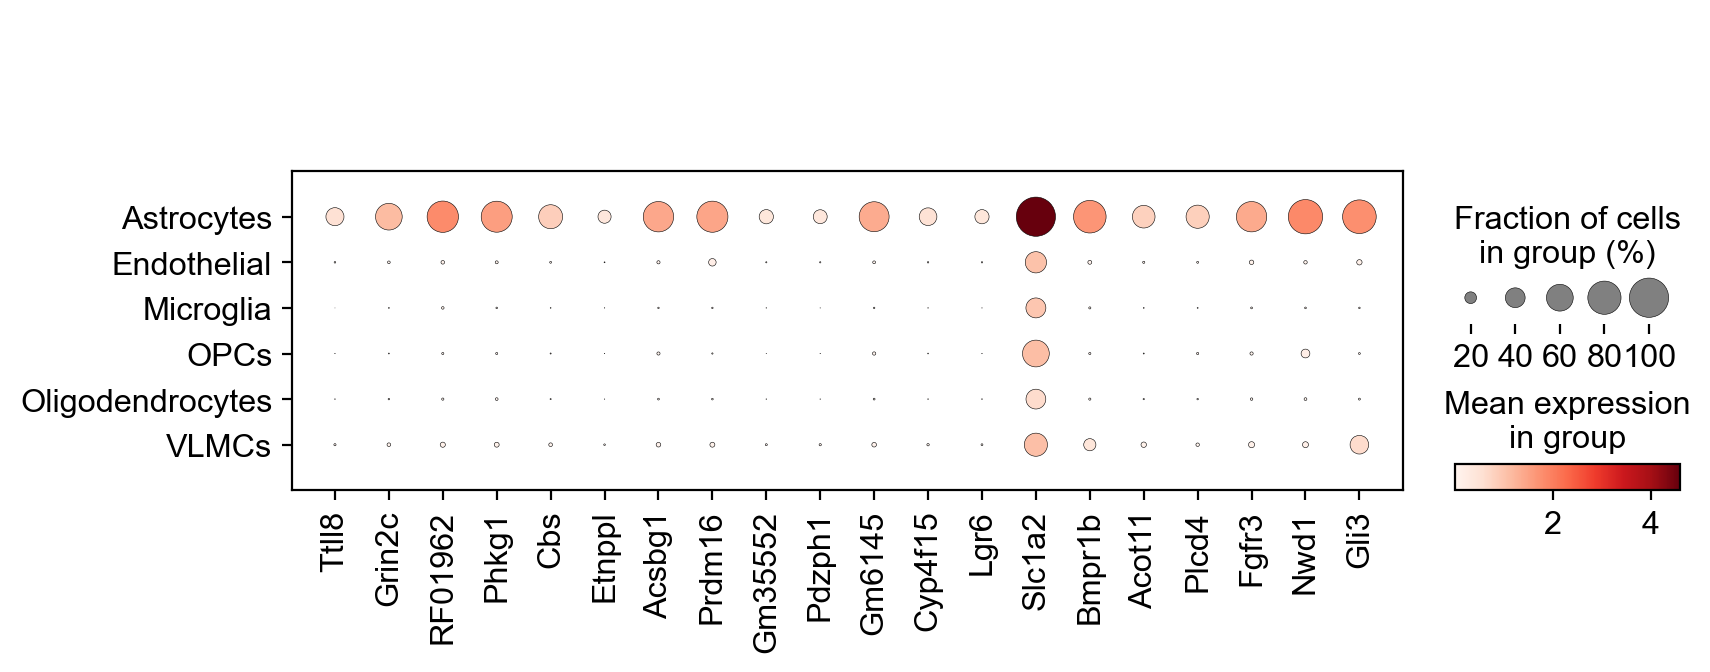

Index(['Ttll8', 'Grin2c', 'RF01962', 'Phkg1', 'Cbs', 'Etnppl', 'Acsbg1',
       'Prdm16', 'Gm35552', 'Pdzph1', 'Gm6145', 'Cyp4f15', 'Lgr6', 'Slc1a2',
       'Bmpr1b', 'Acot11', 'Plcd4', 'Fgfr3', 'Nwd1', 'Gli3'],
      dtype='object')


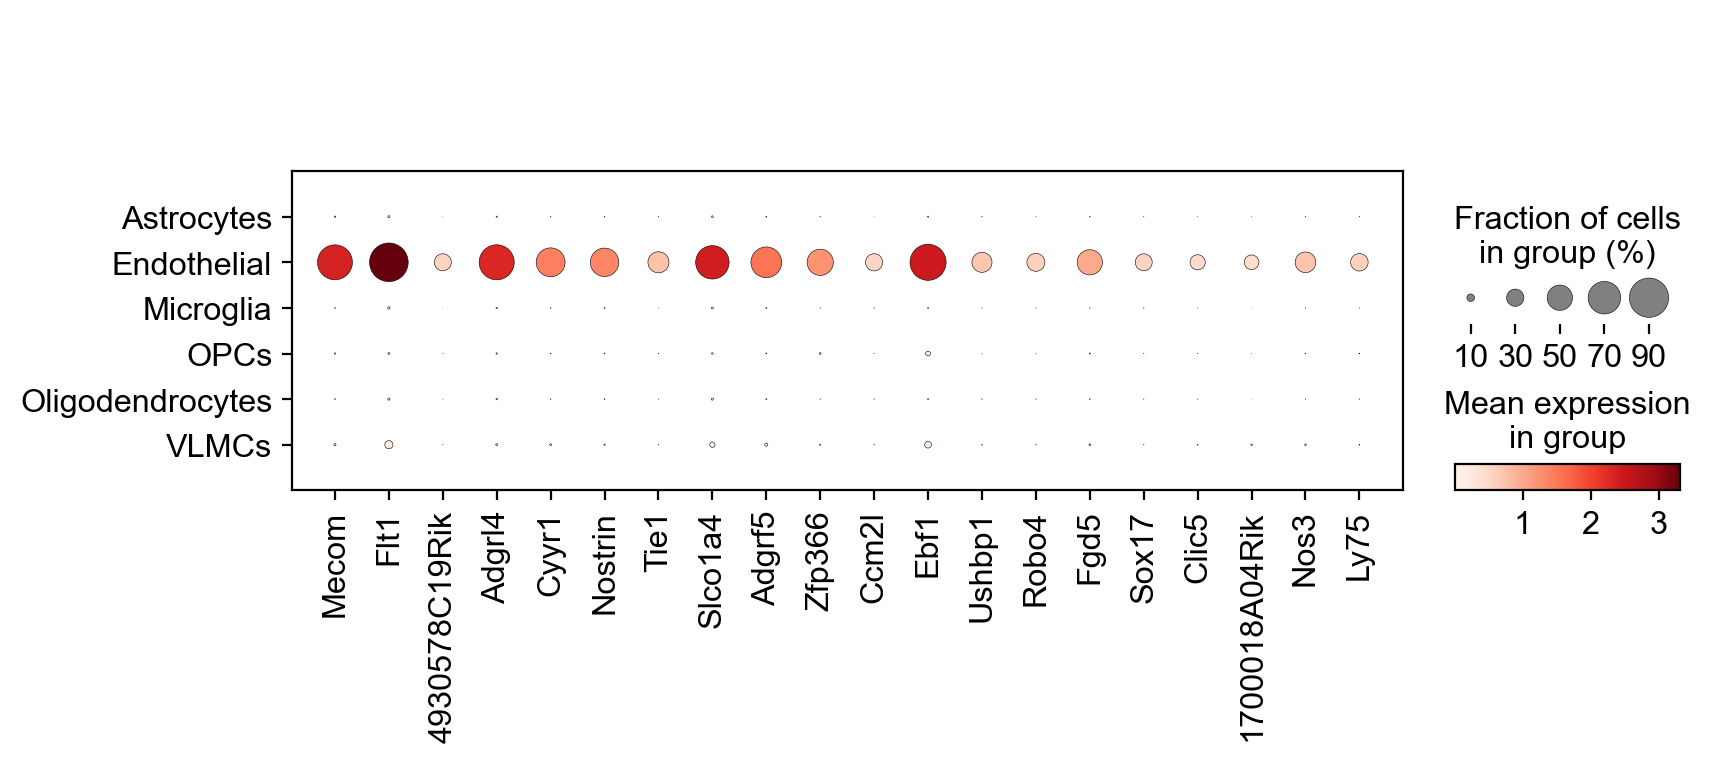

Index(['Mecom', 'Flt1', '4930578C19Rik', 'Adgrl4', 'Cyyr1', 'Nostrin', 'Tie1',
       'Slco1a4', 'Adgrf5', 'Zfp366', 'Ccm2l', 'Ebf1', 'Ushbp1', 'Robo4',
       'Fgd5', 'Sox17', 'Clic5', '1700018A04Rik', 'Nos3', 'Ly75'],
      dtype='object')


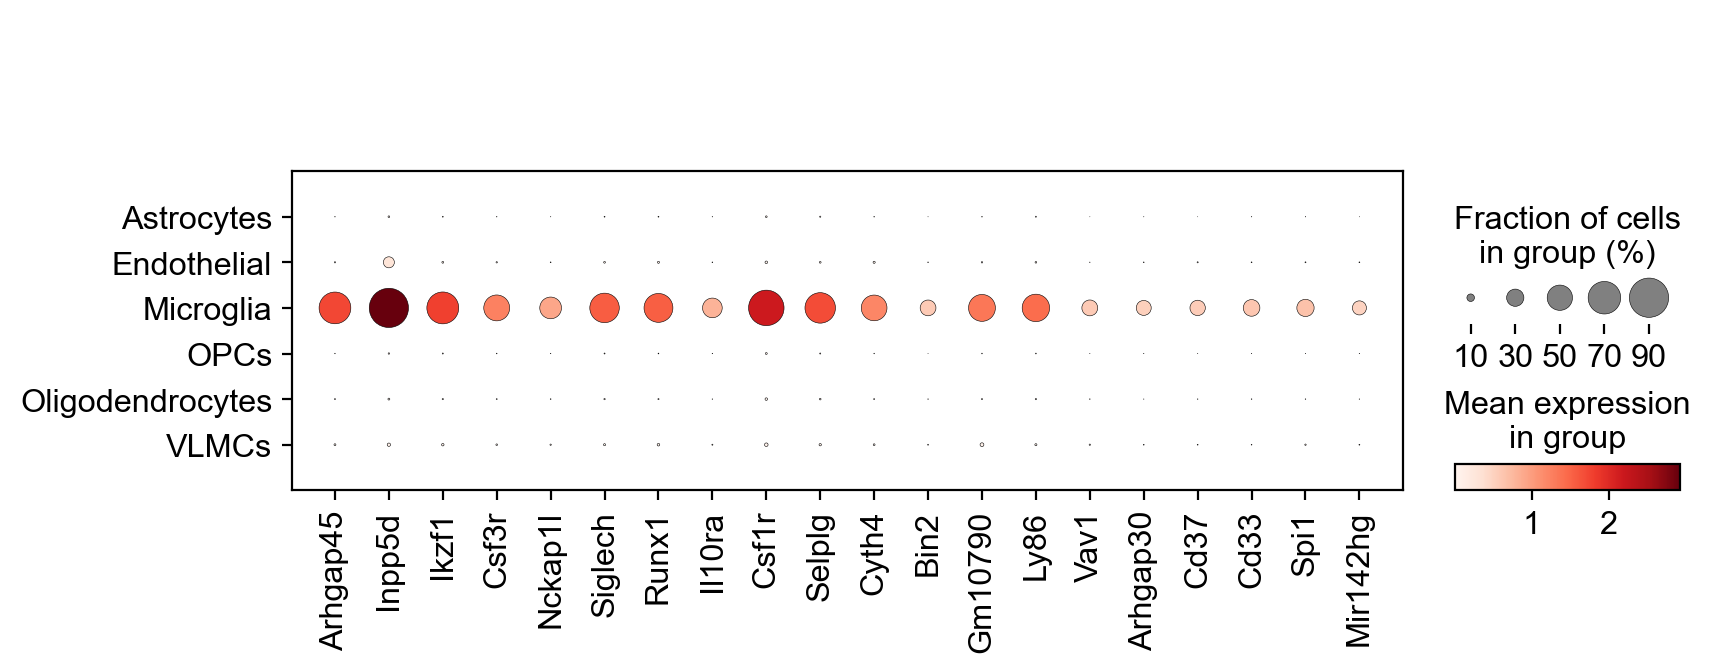

Index(['Arhgap45', 'Inpp5d', 'Ikzf1', 'Csf3r', 'Nckap1l', 'Siglech', 'Runx1',
       'Il10ra', 'Csf1r', 'Selplg', 'Cyth4', 'Bin2', 'Gm10790', 'Ly86', 'Vav1',
       'Arhgap30', 'Cd37', 'Cd33', 'Spi1', 'Mir142hg'],
      dtype='object')


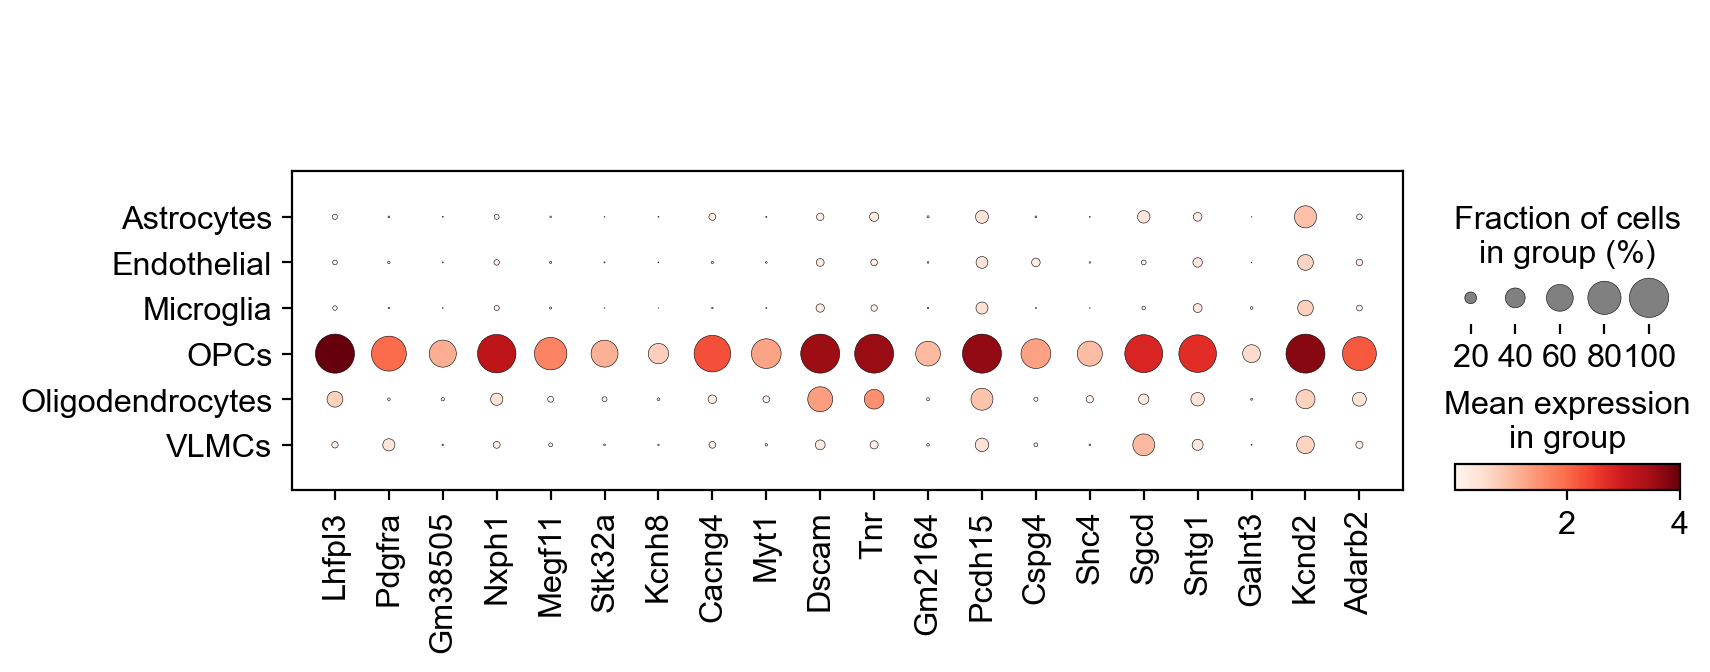

Index(['Lhfpl3', 'Pdgfra', 'Gm38505', 'Nxph1', 'Megf11', 'Stk32a', 'Kcnh8',
       'Cacng4', 'Myt1', 'Dscam', 'Tnr', 'Gm2164', 'Pcdh15', 'Cspg4', 'Shc4',
       'Sgcd', 'Sntg1', 'Galnt3', 'Kcnd2', 'Adarb2'],
      dtype='object')


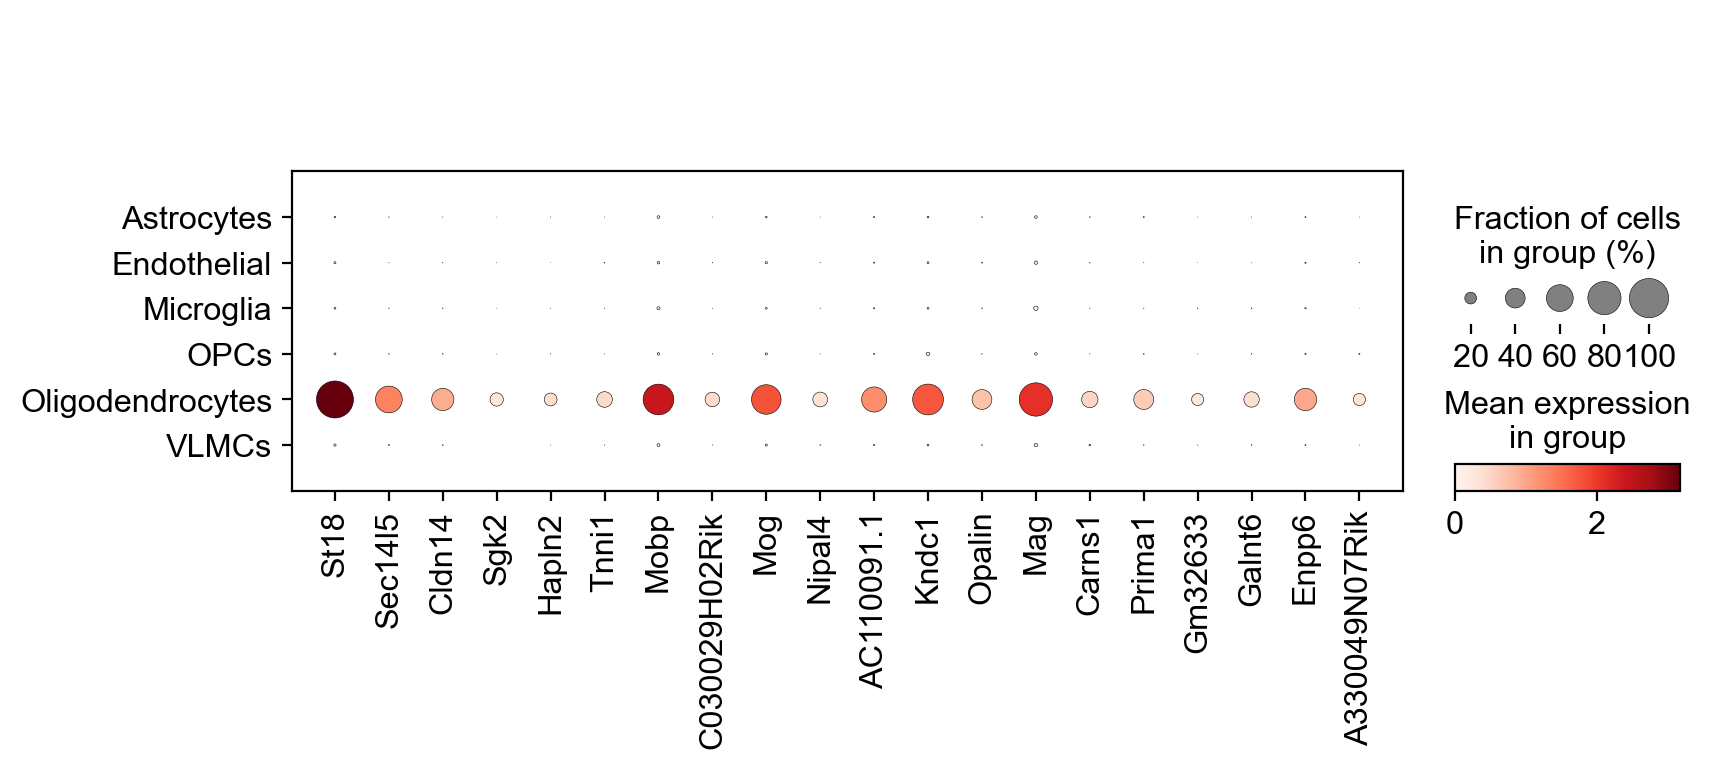

Index(['St18', 'Sec14l5', 'Cldn14', 'Sgk2', 'Hapln2', 'Tnni1', 'Mobp',
       'C030029H02Rik', 'Mog', 'Nipal4', 'AC110091.1', 'Kndc1', 'Opalin',
       'Mag', 'Carns1', 'Prima1', 'Gm32633', 'Galnt6', 'Enpp6',
       'A330049N07Rik'],
      dtype='object')


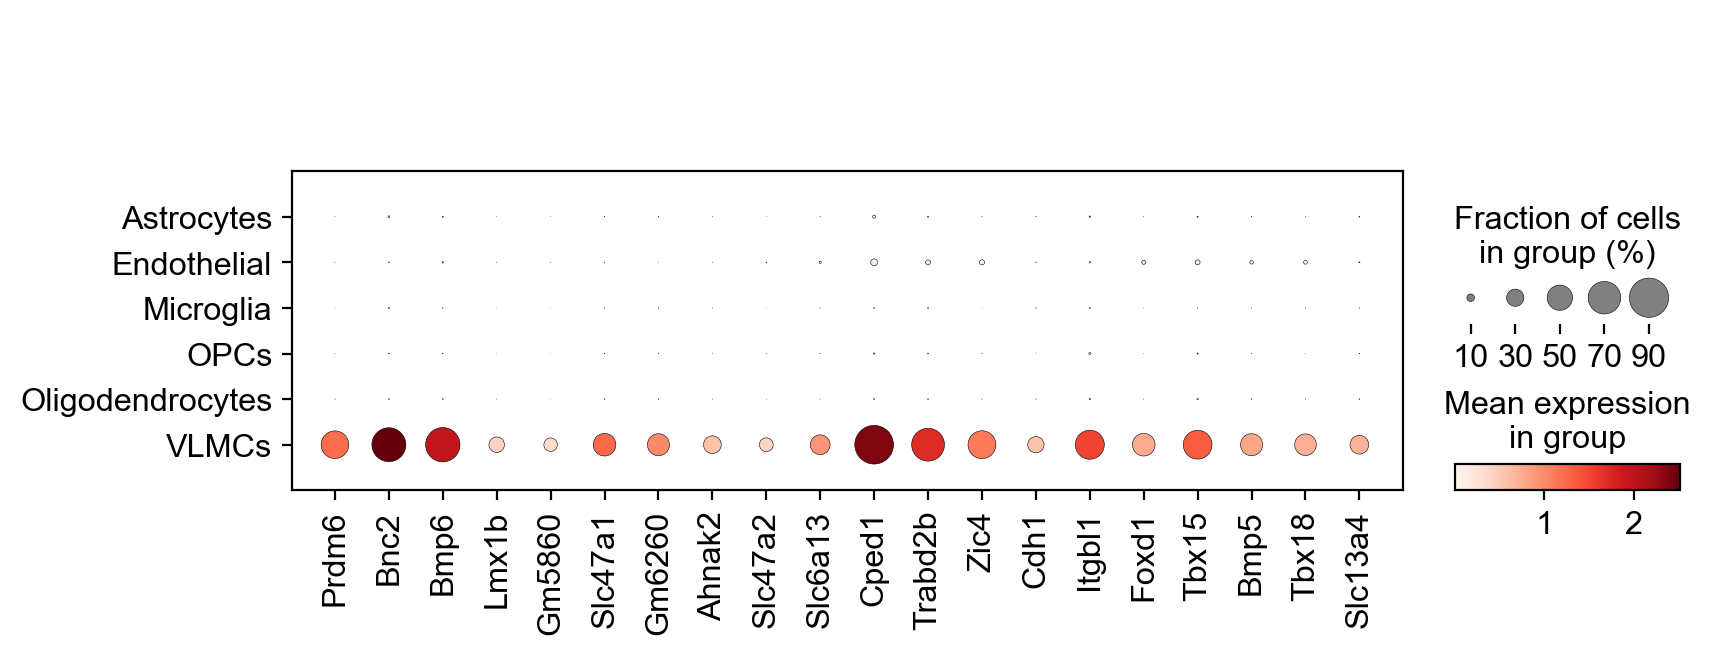

Index(['Prdm6', 'Bnc2', 'Bmp6', 'Lmx1b', 'Gm5860', 'Slc47a1', 'Gm6260',
       'Ahnak2', 'Slc47a2', 'Slc6a13', 'Cped1', 'Trabd2b', 'Zic4', 'Cdh1',
       'Itgbl1', 'Foxd1', 'Tbx15', 'Bmp5', 'Tbx18', 'Slc13a4'],
      dtype='object')


In [26]:
for i in adata.obs.Subclass.values.categories:

    de_genes = DE(adata, obs_id='Subclass', obs_id_test=i, ref='rest').index
    
    sc.pl.dotplot(adata, de_genes[0:20], groupby='Subclass')
    print(de_genes[0:20])

In [23]:
subs = []
for i in adata.obs.Subclass.values.categories:
    sub = adata[adata.obs.Subclass==i,:]
    
    sc.pp.subsample(sub, n_obs=1983)
    subs.append(sub)
    
adata_subs = subs[0].concatenate(subs[1:])

In [24]:
adata_subs.uns['Subclass_colors'] = sns.color_palette('pastel').as_hex()[0:6]

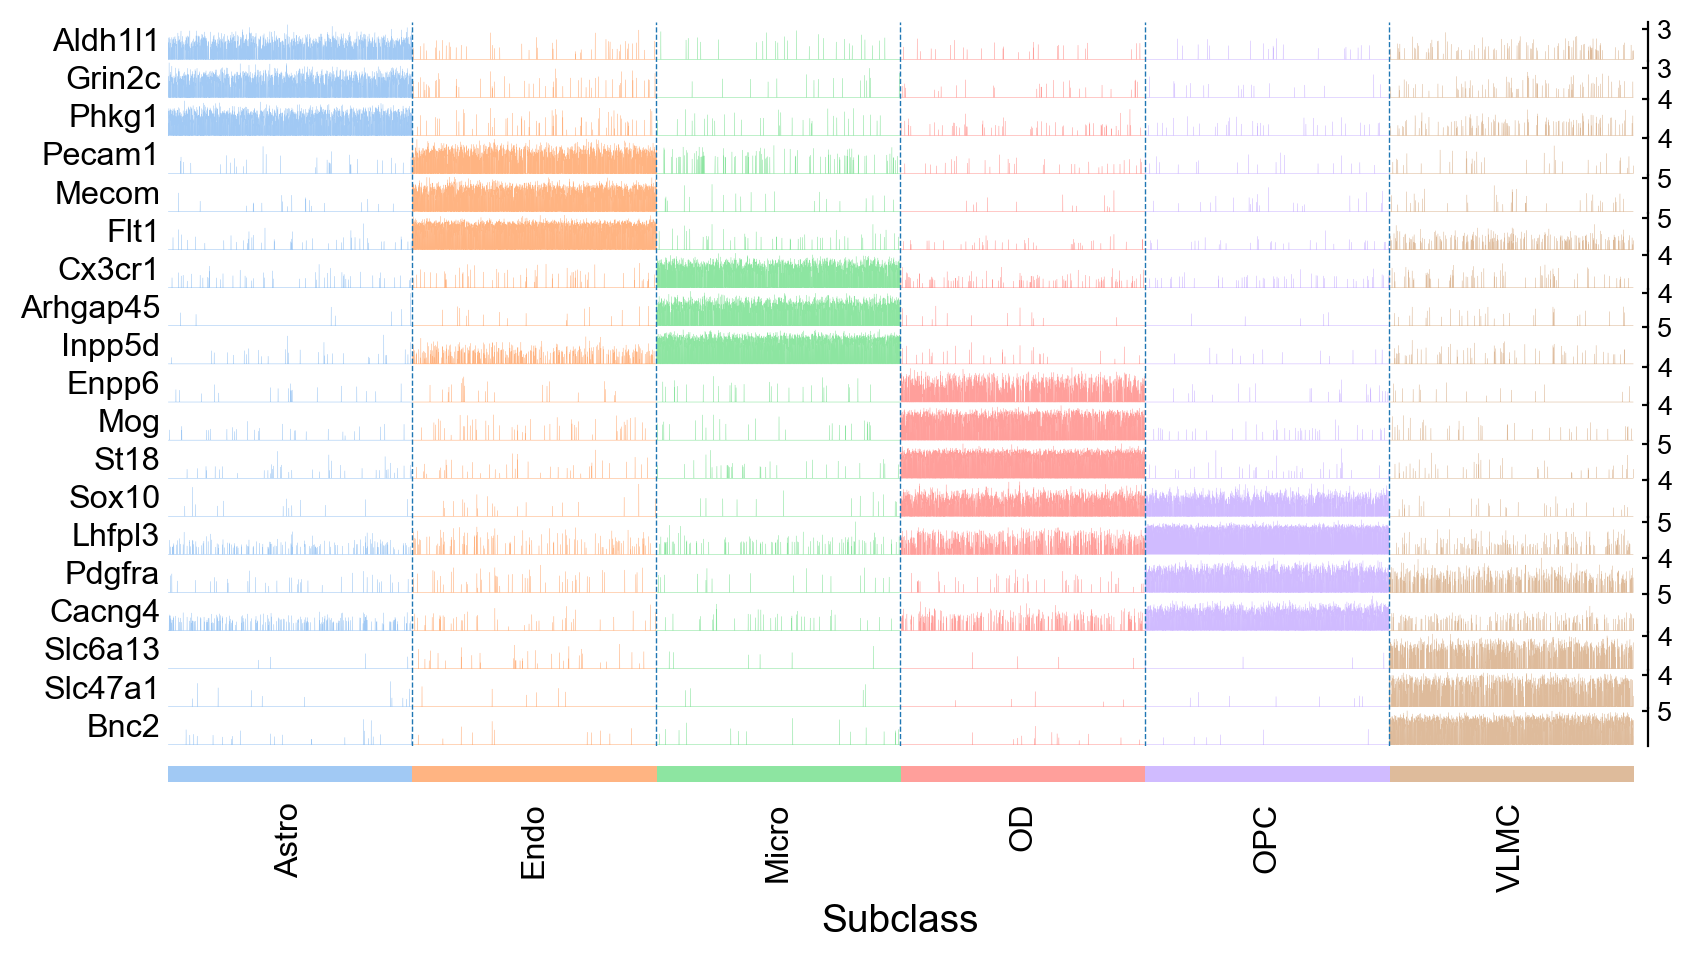

In [27]:
markers = ['Aldh1l1', 'Grin2c', 'Phkg1',
           'Pecam1', 'Mecom', 'Flt1',
           'Cx3cr1',  'Arhgap45', 'Inpp5d',
           'Enpp6', 'Mog', 'St18', 
           'Sox10','Lhfpl3', 'Pdgfra', 'Cacng4',  
           
           'Slc6a13', 'Slc47a1', 'Bnc2']
sc.pl.tracksplot(adata_subs, markers, groupby='Subclass', 
                 figsize=(10,5), save='Non-neurons_tracksplot.pdf')

In [186]:
adata_subs.obs.Subclass

CATCGCTGTTAAGGGC-1-P38_2b-P38-P38-0    Astro
CTCTCAGAGCTGACAG-1-P38_2a-P38-P38-0    Astro
GAGGGTAGTACAGTCT-1-P21_2a-P21-P21-0    Astro
GGCTTTCAGCTACTAC-1-P17_1a-P17-P17-0    Astro
CAGATTGCATTGTCGA-1-P8_1b-P8-P8-0       Astro
                                       ...  
AGCGTCGTCATTGGTG-1-P17_1b-P17-P17-5     VLMC
GGACGTCTCAGTCAGT-1-P17_1b-P17-P17-5     VLMC
GCGATCGAGGCTAAAT-1-P21_1b-P21-P21-5     VLMC
TCTCAGCTCGTGCTCT-1-P28_2a-P28-P28-5     VLMC
TTGTTTGAGTCAGAGC-1-P14_2b-P14-P14-5     VLMC
Name: Subclass, Length: 11898, dtype: category
Categories (6, object): ['Astro', 'Endo', 'Micro', 'OD', 'OPC', 'VLMC']

In [185]:
adata_subs.uns['Subclass_colors']

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b']

# Type freqs

## Astro, OD, OPC

In [29]:
adata.obs.Subclass

AAACCCAAGACATAGT-1-P8_1a-P8-P8         OPC
AAACCCATCATGTCAG-1-P8_1a-P8-P8        Endo
AAACCCATCCTTATGT-1-P8_1a-P8-P8       Astro
AAAGAACTCGCTGCGA-1-P8_1a-P8-P8       Astro
AAAGGTACAGTGGGTA-1-P8_1a-P8-P8        VLMC
                                     ...  
TTTGACTTCTTTGCTA-1-P38_2b-P38-P38      OPC
TTTGGAGGTCGACTGC-1-P38_2b-P38-P38    Astro
TTTGGAGTCATGGCCG-1-P38_2b-P38-P38    Micro
TTTGGAGTCCGACATA-1-P38_2b-P38-P38    Astro
TTTGGTTAGTTCACTG-1-P38_2b-P38-P38       OD
Name: Subclass, Length: 38495, dtype: category
Categories (6, object): ['Astro', 'Endo', 'Micro', 'OD', 'OPC', 'VLMC']

In [30]:
as_od_opc = adata[adata.obs.Subclass!='Micro']
as_od_opc = as_od_opc[as_od_opc.obs.Subclass!='Endo']
as_od_opc = as_od_opc[as_od_opc.obs.Subclass!='VLMC']

No `Astro_C` after P8. No `OD_B` at P8.

In [33]:
as_od_opc = as_od_opc[as_od_opc.obs.Type!='Astro_C']

In [60]:
adata.obs.Type.values.categories

Index(['Astro_A', 'Astro_B', 'Astro_C', 'Endo', 'Micro', 'OD_A', 'OD_B',
       'OD_C', 'OPC_A', 'OPC_B', 'VLMC_A', 'VLMC_B'],
      dtype='object')

In [48]:
freqs = [[],[],[],[],[],[],[]]
f = 0
for i in ['Astro_A', 'Astro_B', 'OD_A', 'OD_B', 'OD_C', 'OPC_A', 'OPC_B']:
    for age in adata.obs.Age.values.categories:
        age_obj = adata[adata.obs.Age==age,:]
        freqs[f].append(age_obj[age_obj.obs.Type==i].shape[0]/age_obj.shape[0])
    f = f+1

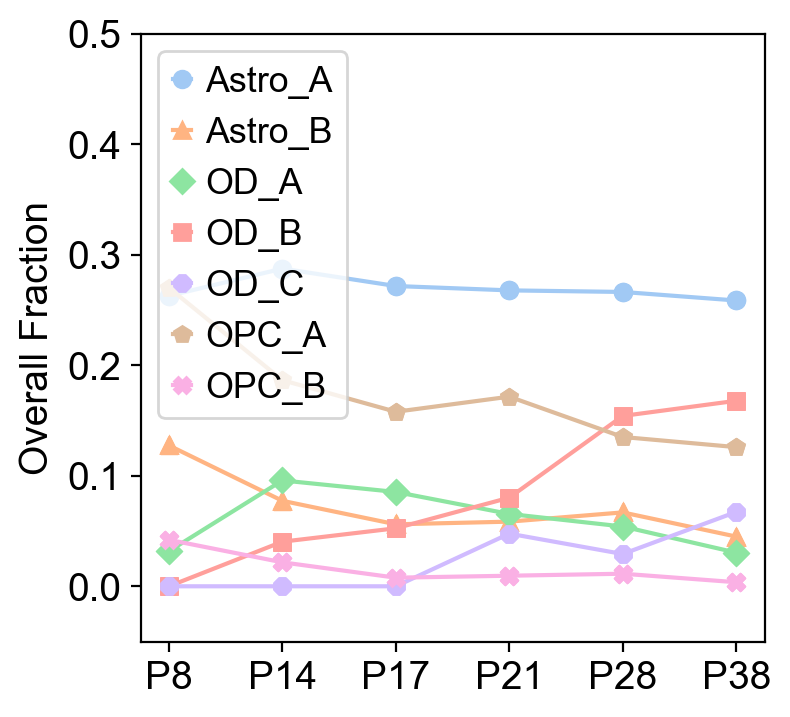

In [57]:
markers = ['o', '^', 'D', 's', '8', 'p', 'X']
palette = sns.color_palette('pastel').as_hex()
ages = adata.obs.Age.values.categories

for count, type_ in enumerate(['Astro_A', 'Astro_B', 'OD_A', 'OD_B', 'OD_C', 'OPC_A', 'OPC_B']):
    plt.scatter(ages, freqs[count], marker = markers[count], color=palette[count])
    plt.plot(ages, freqs[count], label=type_, marker = markers[count], color=palette[count])
    
#plt.legend(bbox_to_anchor=(1, 1))
plt.legend()
plt.ylim([-0.05,0.5])
plt.ylabel('Overall Fraction')
plt.grid(False)
plt.savefig('ast-od-opc_type_freqs.pdf')

In [61]:
freqs = [[],[],[],[],]
f = 0
for i in ['Endo', 'Micro', 'VLMC_A', 'VLMC_B']:
    for age in adata.obs.Age.values.categories:
        age_obj = adata[adata.obs.Age==age,:]
        freqs[f].append(age_obj[age_obj.obs.Type==i].shape[0]/age_obj.shape[0])
    f = f+1

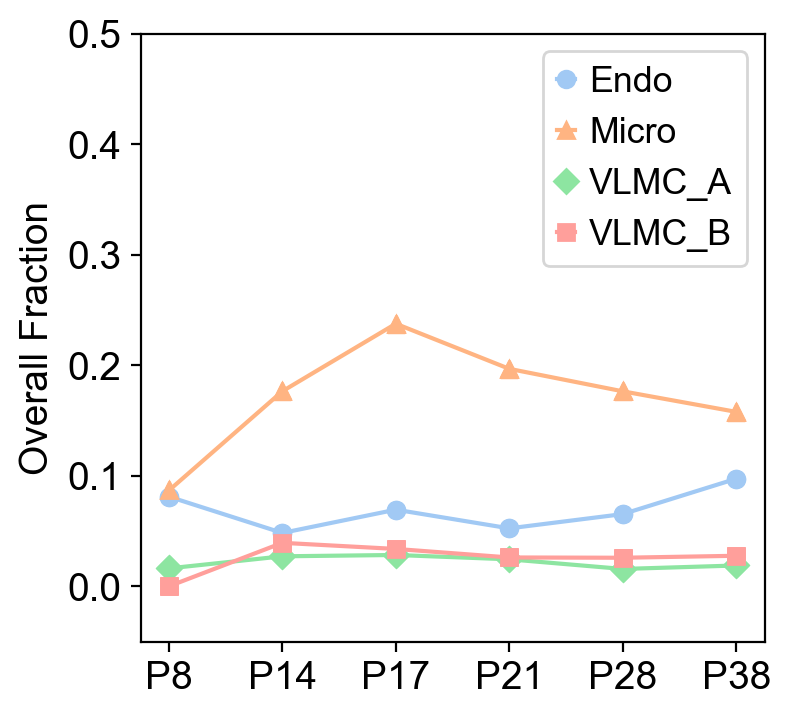

In [64]:
markers = ['o', '^', 'D', 's', '8', 'p', 'X']
palette = sns.color_palette('pastel').as_hex()
ages = adata.obs.Age.values.categories

for count, type_ in enumerate(['Endo', 'Micro', 'VLMC_A', 'VLMC_B']):
    plt.scatter(ages, freqs[count], marker = markers[count], color=palette[count])
    plt.plot(ages, freqs[count], label=type_, marker = markers[count], color=palette[count])
    
#plt.legend(bbox_to_anchor=(1, 1))
plt.legend()
plt.ylim([-0.05,0.5])
plt.ylabel('Overall Fraction')
plt.grid(False)
plt.savefig('others_type_freqs.pdf')

# Subclass freq

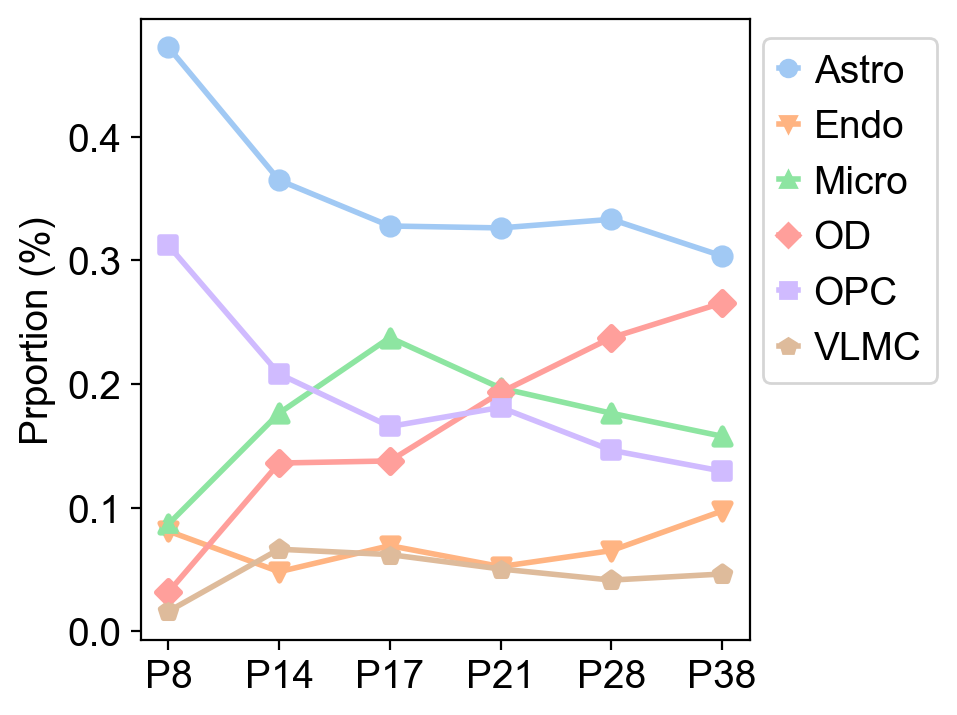

In [14]:
plt.figure(figsize=(5,3.8))
palette = sns.color_palette('pastel').as_hex()[0:6]
marker = ['o', 'v', '^', 'D', 's', 'p', '*']
ages = adata.obs.Age.values.categories

idx = 0
for i in adata.obs.Subclass.values.categories:
    fracs = []
    for age in ages:
        age_obj = adata[adata.obs.Age==age,:]

        fracs.append(age_obj.obs.Subclass.value_counts(normalize=True)[i])
    plt.scatter(ages, fracs, marker=marker[idx], color=palette[idx],
               linewidths=2, )
    plt.plot(ages, fracs, marker=marker[idx], color=palette[idx], linewidth=2, label=i)
    idx = idx + 1
    plt.legend(bbox_to_anchor=(0.99, 1), loc='upper left', fontsize=14, ncol=1)

#plt.legend()
plt.ylabel('Prportion (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.1,0.2,0.3,0.4],fontsize=14)
plt.grid(False)

plt.tight_layout()
plt.savefig('figures/non-neurons_subclass_freqs.pdf')


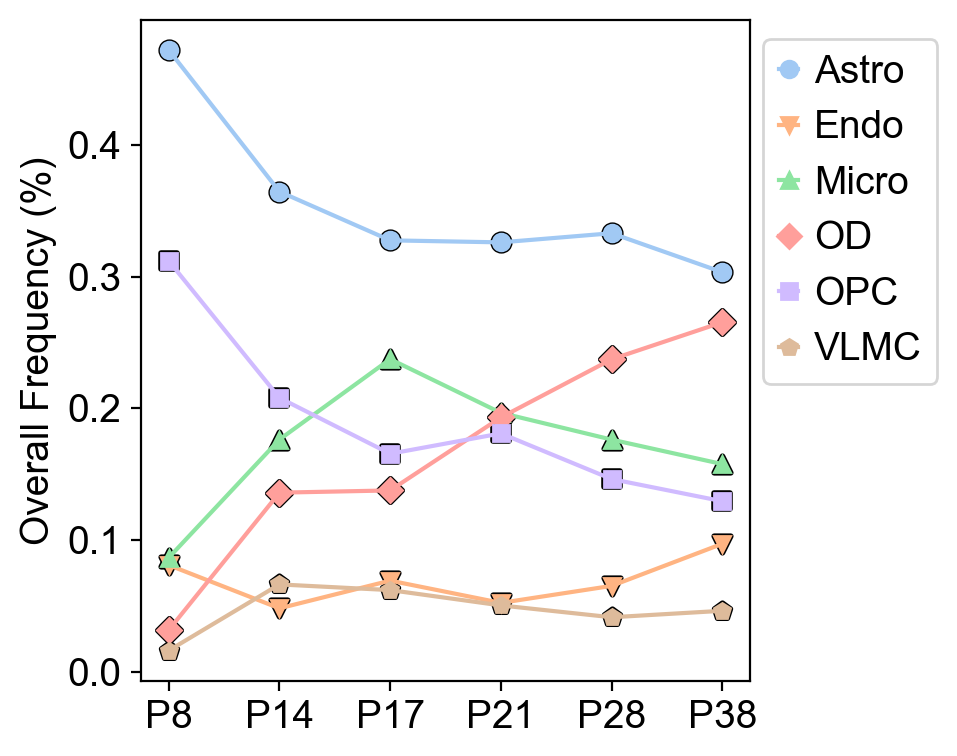

In [171]:
plt.figure(figsize=(5,4))
palette = sns.color_palette('pastel').as_hex()[0:6]
marker = ['o', 'v', '^', 'D', 's', 'p', '*']
ages = adata.obs.Age.values.categories

idx = 0
for i in adata.obs.Subclass.values.categories:
    fracs = []
    for age in ages:
        age_obj = adata[adata.obs.Age==age,:]

        fracs.append(age_obj.obs.Subclass.value_counts(normalize=True)[i])
    plt.scatter(ages, fracs, marker=marker[idx], color=palette[idx],
               linewidths=2, edgecolors='black')
    plt.plot(ages, fracs, marker=marker[idx], color=palette[idx], label=i)
    idx = idx + 1
    plt.legend(bbox_to_anchor=(0.99, 1), loc='upper left', fontsize=14, ncol=1)

plt.ylabel('Overall Frequency (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.1,0.2,0.3,0.4],fontsize=14)
plt.grid(False)

plt.tight_layout()
plt.savefig('figures/non-neurons_subclass_freqs.pdf')


# UMAPs

In [182]:
cols = sns.color_palette('pastel').as_hex() + sns.color_palette('Set2').as_hex()[0:1]

In [183]:
adata.uns['Type_colors'] = cols

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


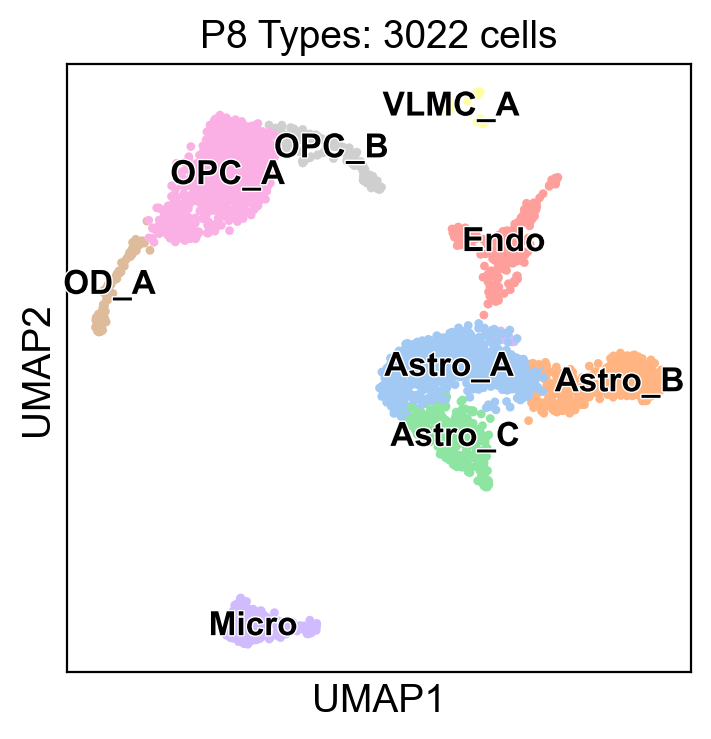

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


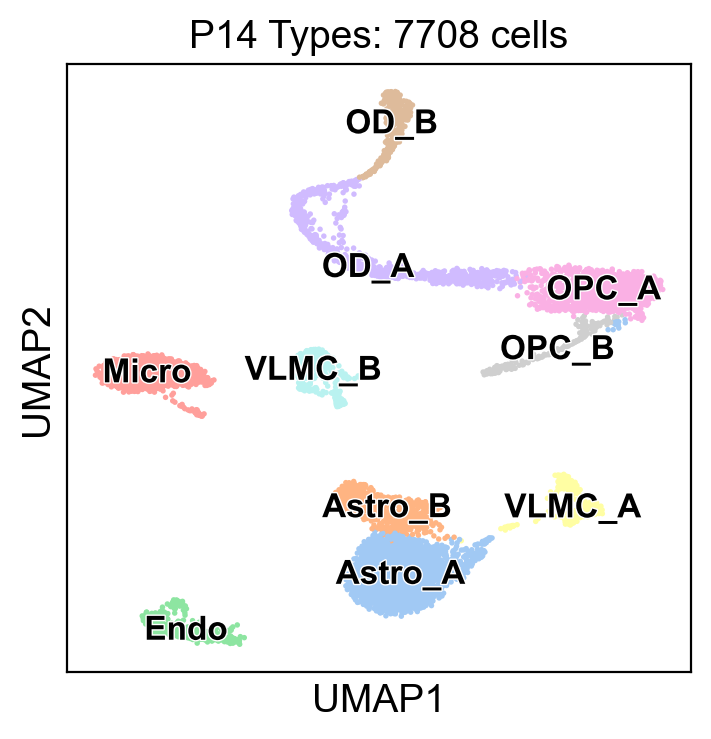

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


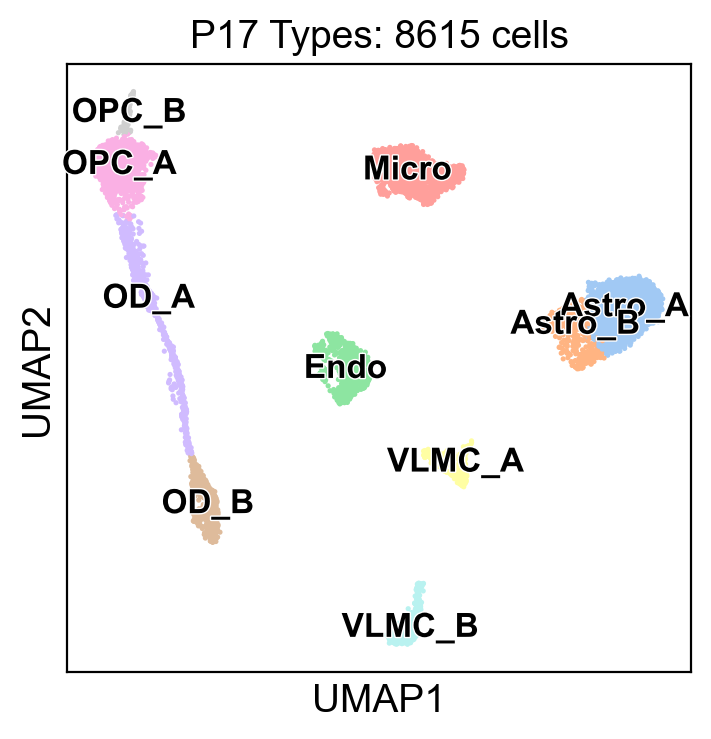

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


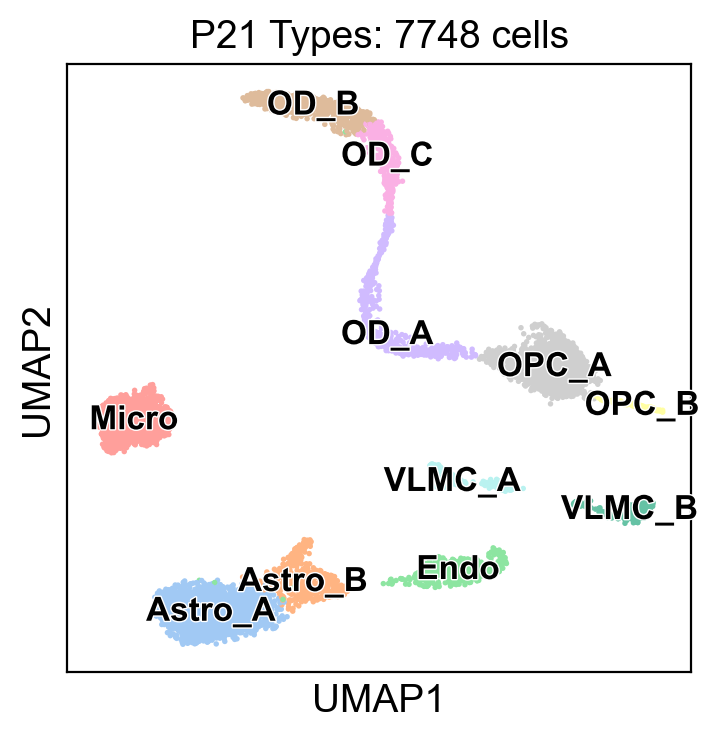

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


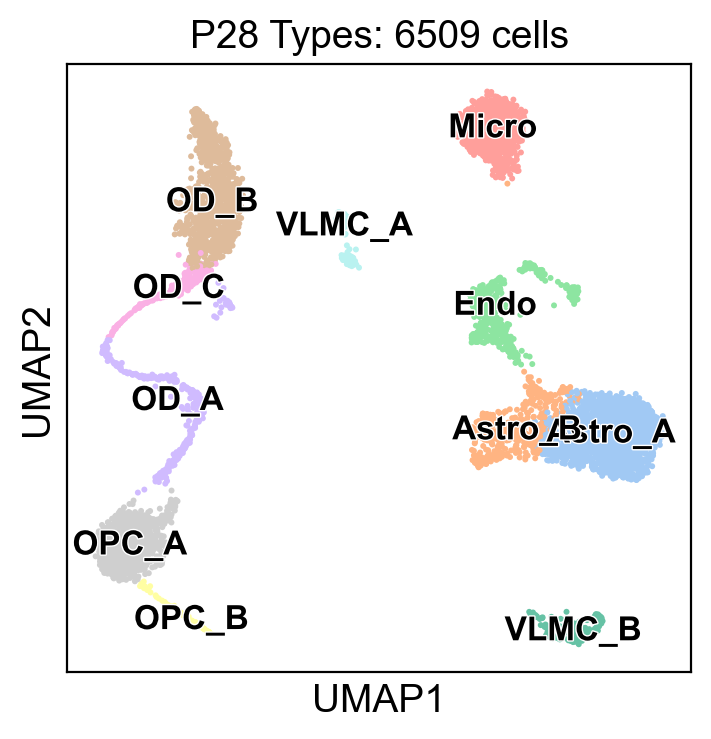

Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'leiden' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


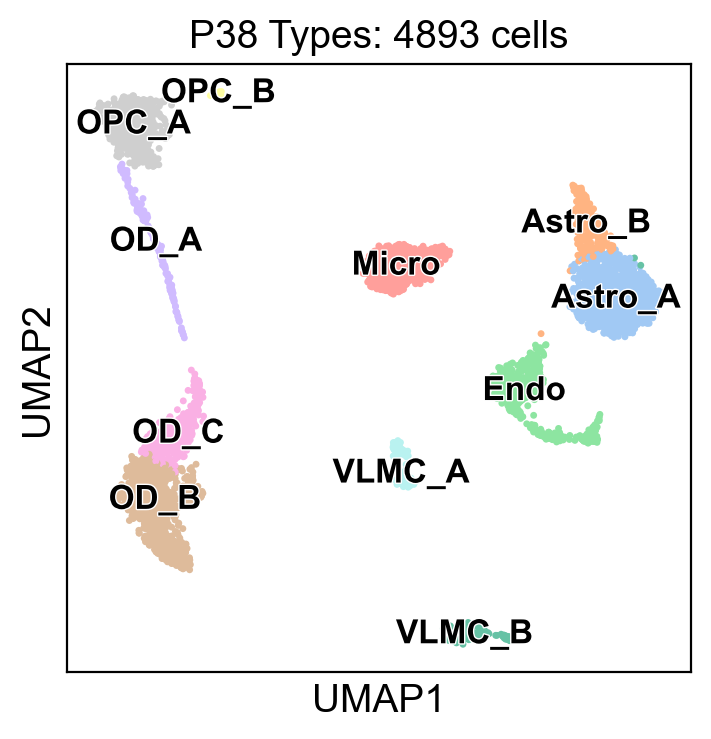

In [184]:
for i in adata.obs.Age.values.categories:

    age = adata[adata.obs.Age==i,:]
    sc.pl.umap(shuffle(age), color=['Type',], legend_loc='on data', legend_fontsize='12',  title=i+' Types: ' + str(age.shape[0]) + ' cells', 
           legend_fontoutline=1 , save=i+'non-neurons.pdf')

In [68]:
astro_P8 = P8[P8.obs.leiden=='1',:].concatenate(P8[P8.obs.leiden=='2',:],
                                               P8[P8.obs.leiden=='3',:],
                                               P8[P8.obs.leiden=='4',:],
                                               P8[P8.obs.leiden=='7',:])

In [70]:
astro_P8.obs.leiden = pd.Categorical(astro_P8.obs.leiden.values)

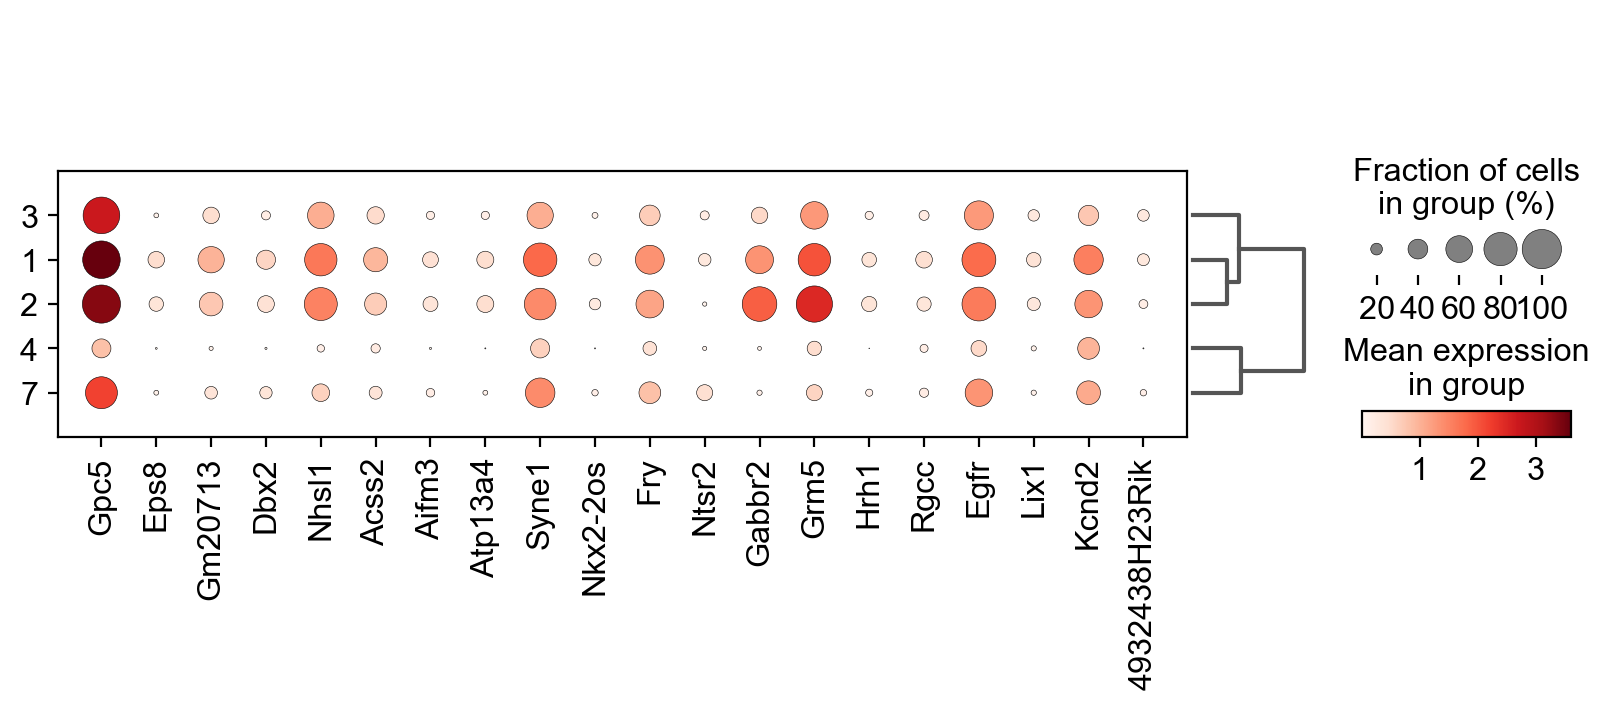

Index(['Gpc5', 'Eps8', 'Gm20713', 'Dbx2', 'Nhsl1', 'Acss2', 'Aifm3', 'Atp13a4',
       'Syne1', 'Nkx2-2os', 'Fry', 'Ntsr2', 'Gabbr2', 'Grm5', 'Hrh1', 'Rgcc',
       'Egfr', 'Lix1', 'Kcnd2', '4932438H23Rik'],
      dtype='object')


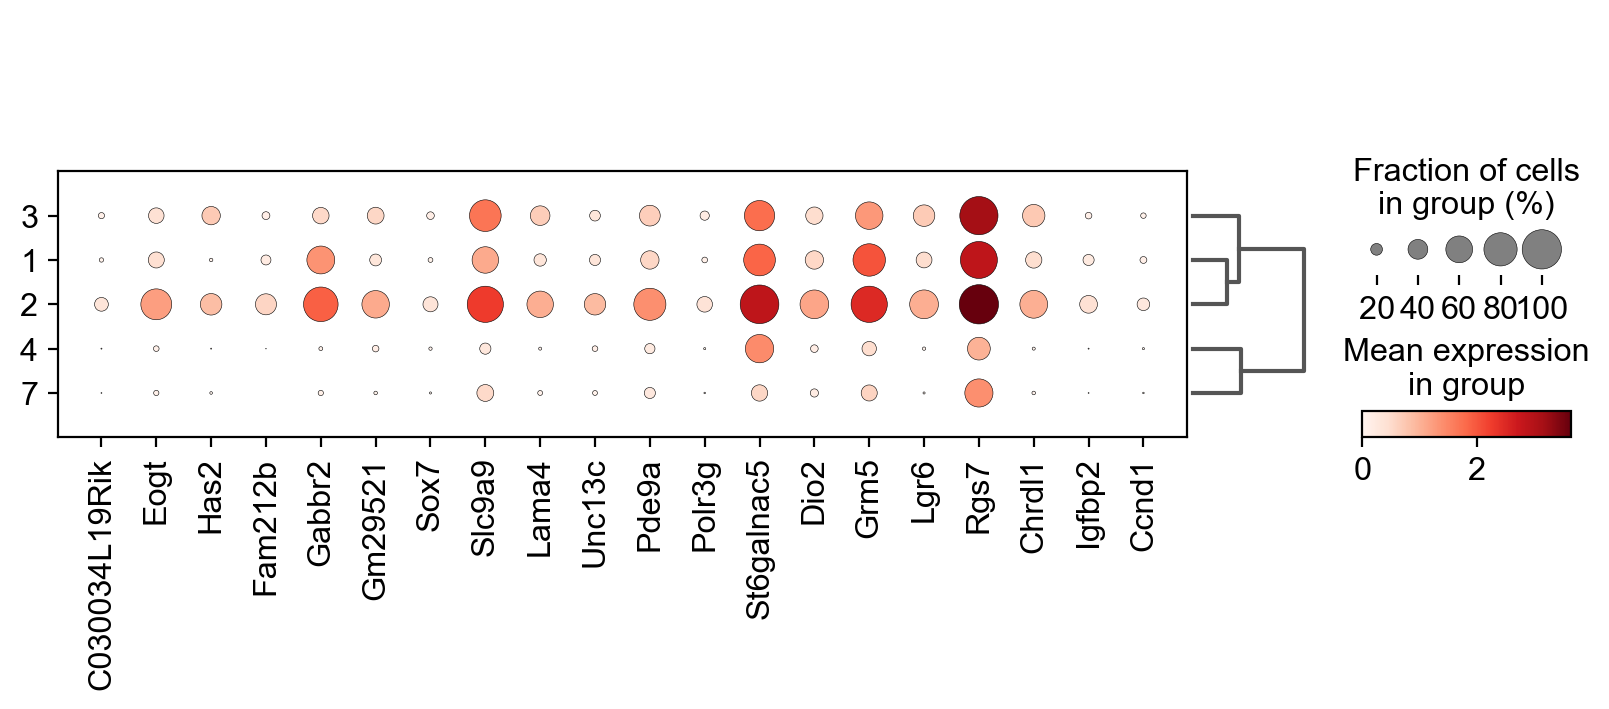

Index(['C030034L19Rik', 'Eogt', 'Has2', 'Fam212b', 'Gabbr2', 'Gm29521', 'Sox7',
       'Slc9a9', 'Lama4', 'Unc13c', 'Pde9a', 'Polr3g', 'St6galnac5', 'Dio2',
       'Grm5', 'Lgr6', 'Rgs7', 'Chrdl1', 'Igfbp2', 'Ccnd1'],
      dtype='object')


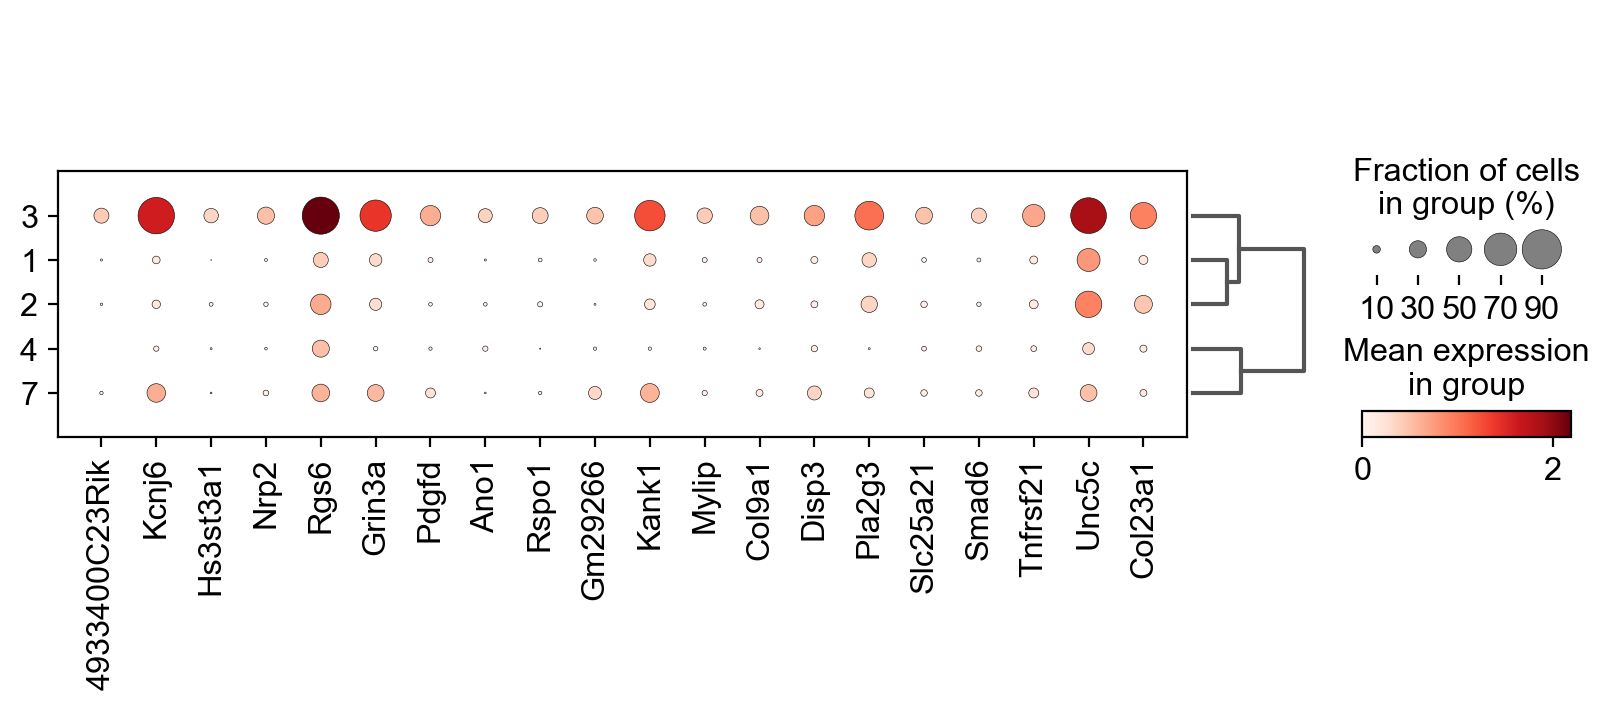

Index(['4933400C23Rik', 'Kcnj6', 'Hs3st3a1', 'Nrp2', 'Rgs6', 'Grin3a', 'Pdgfd',
       'Ano1', 'Rspo1', 'Gm29266', 'Kank1', 'Mylip', 'Col9a1', 'Disp3',
       'Pla2g3', 'Slc25a21', 'Smad6', 'Tnfrsf21', 'Unc5c', 'Col23a1'],
      dtype='object')


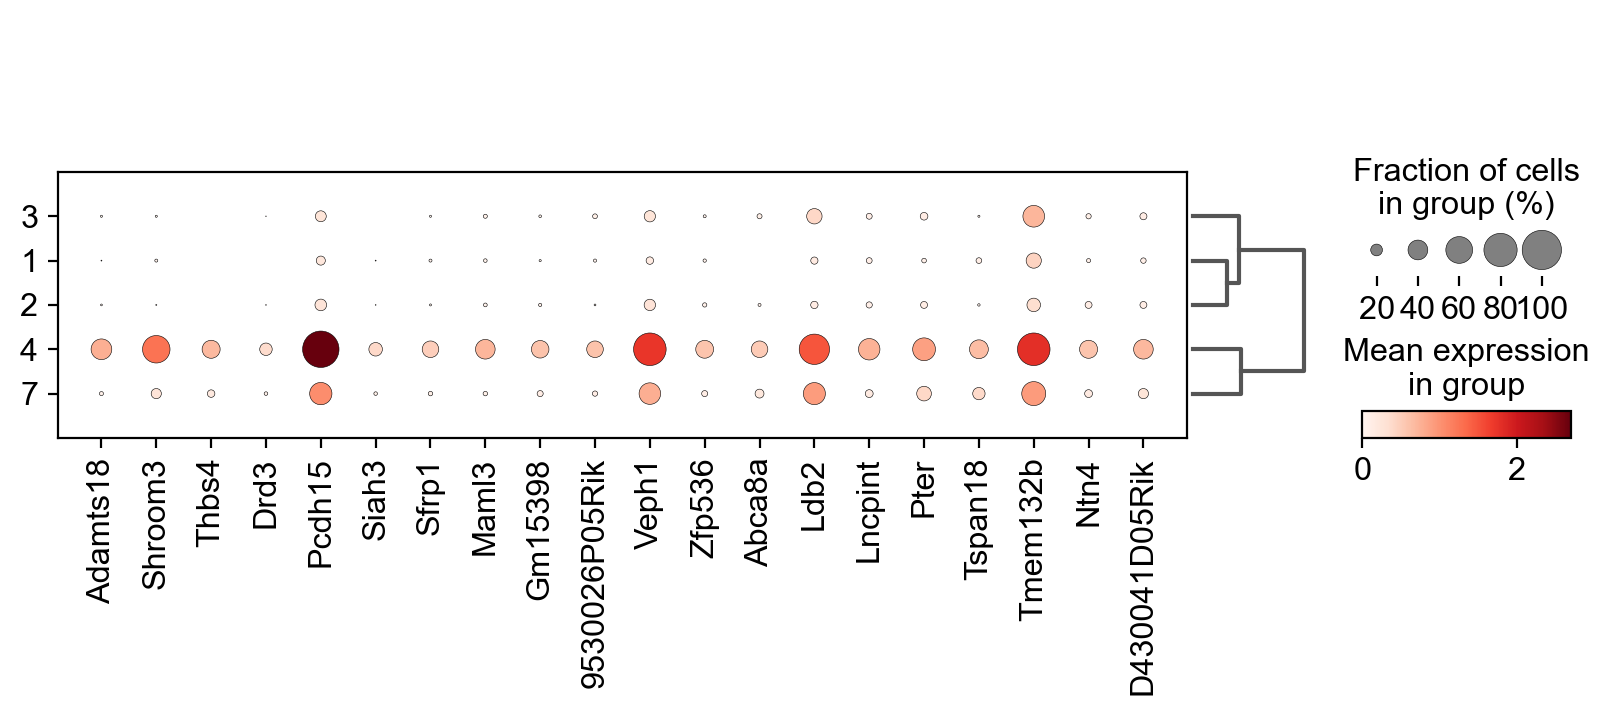

Index(['Adamts18', 'Shroom3', 'Thbs4', 'Drd3', 'Pcdh15', 'Siah3', 'Sfrp1',
       'Maml3', 'Gm15398', '9530026P05Rik', 'Veph1', 'Zfp536', 'Abca8a',
       'Ldb2', 'Lncpint', 'Pter', 'Tspan18', 'Tmem132b', 'Ntn4',
       'D430041D05Rik'],
      dtype='object')


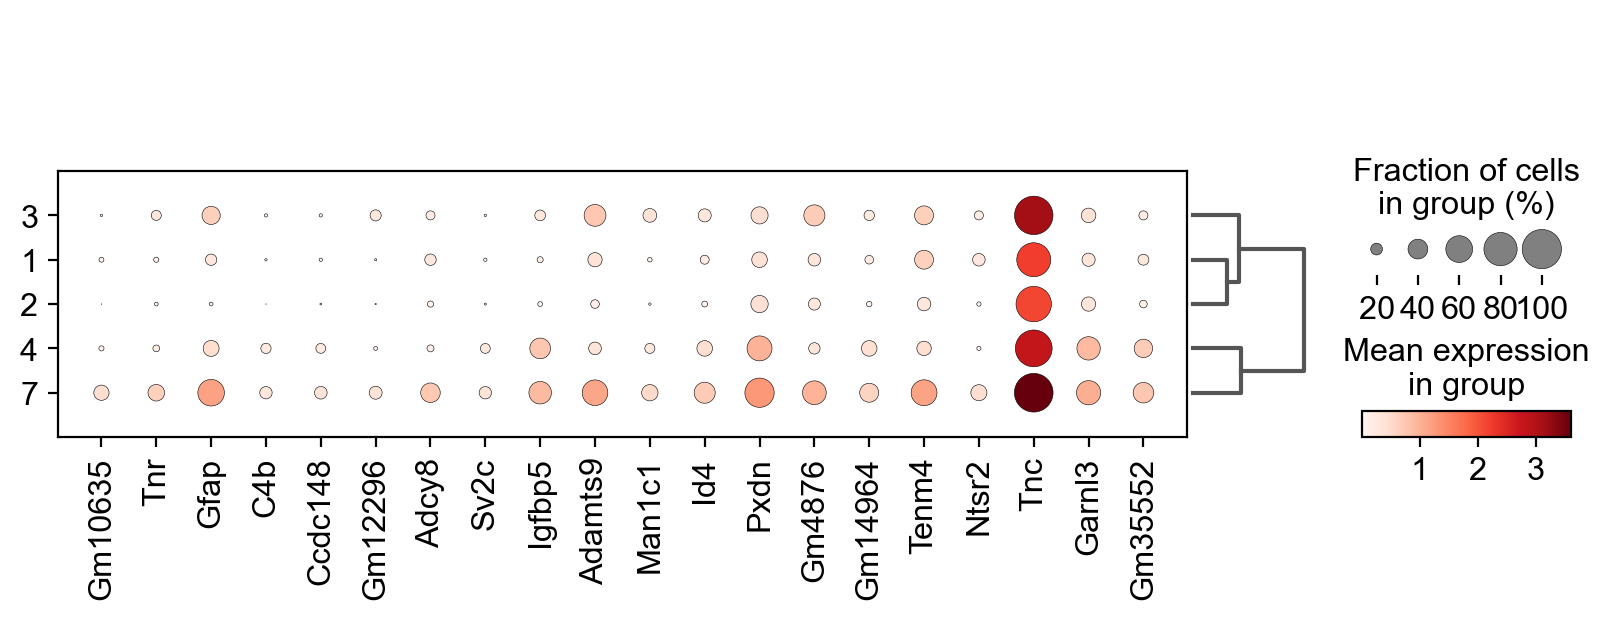

Index(['Gm10635', 'Tnr', 'Gfap', 'C4b', 'Ccdc148', 'Gm12296', 'Adcy8', 'Sv2c',
       'Igfbp5', 'Adamts9', 'Man1c1', 'Id4', 'Pxdn', 'Gm4876', 'Gm14964',
       'Tenm4', 'Ntsr2', 'Tnc', 'Garnl3', 'Gm35552'],
      dtype='object')


In [72]:
for i in astro_P8.obs.leiden.values.categories:

    de_genes = DE(astro_P8, obs_id='leiden', obs_id_test=i, ref='rest').index
    
    sc.pl.dotplot(astro_P8, de_genes[0:20], groupby='leiden', dendrogram=True)
    print(de_genes[0:20])

# Type marker plots

In [12]:
pd.Categorical(adata.obs.Type)

['OPC_A', 'Endo', 'Astro_A', 'Astro_A', 'VLMC_A', ..., 'OPC_A', 'Astro_A', 'Micro', 'Astro_A', 'OD_C']
Length: 38495
Categories (12, object): ['Astro_A', 'Astro_B', 'Astro_C', 'Endo', ..., 'OPC_A', 'OPC_B', 'VLMC_A', 'VLMC_B']

In [13]:
adata = adata[adata.obs.Subclass!='Endo',:]
adata = adata[adata.obs.Subclass!='Micro',:]

In [195]:
for i in adata.obs.Type.values.categories:
    print(DE(adata=adata, obs_id='Type', 
             obs_id_test = i, ref='rest')[0:10].index)

Index(['Nphs1', 'Slc1a2', 'Grin2c', 'RF01962', 'Slco1c1', 'Mertk', 'Cyp4f15',
       'Phkg1', 'Acsbg1', 'Atp13a4'],
      dtype='object')
Index(['Thbs4', 'Gfap', 'Tnc', 'A330093E20Rik', 'Igfbp5', 'Celsr1', 'Id3',
       'Vit', 'Gm29260', 'Cmya5'],
      dtype='object')
Index(['Tnc', '4933400C23Rik', '8030451A03Rik', 'Adamts19', 'Gm29266', 'Kcnj6',
       'Ano1', 'Eepd1', 'Has2', 'Ccnd2'],
      dtype='object')
Index(['CT009510.2', '9530059O14Rik', 'Enpp6', 'Gm35501', 'Kif19a', 'Bcas1',
       'Tmem108', 'Bfsp2', 'Fyn', 'Nfasc'],
      dtype='object')
Index(['Hapln2', 'Prr5l', 'Mobp', 'Sec14l5', 'Cyp2j12', 'A230001M10Rik', 'Mog',
       'Slc24a2', 'Gm4593', 'St18'],
      dtype='object')
Index(['Mobp', 'St18', 'Tmeff2', 'Synpr', 'Mbp', 'Rnf220', 'Man1a', 'Plp1',
       'Opalin', 'Mog'],
      dtype='object')
Index(['Lhfpl3', 'Nxph1', 'Pdgfra', 'Megf11', 'Pcdh15', 'Dscam', 'Gm38505',
       'Cspg4', 'Fam196b', 'Cacng4'],
      dtype='object')
Index(['Top2a', 'Hmmr', 'Bub1', 'Esco2', 'Ndc

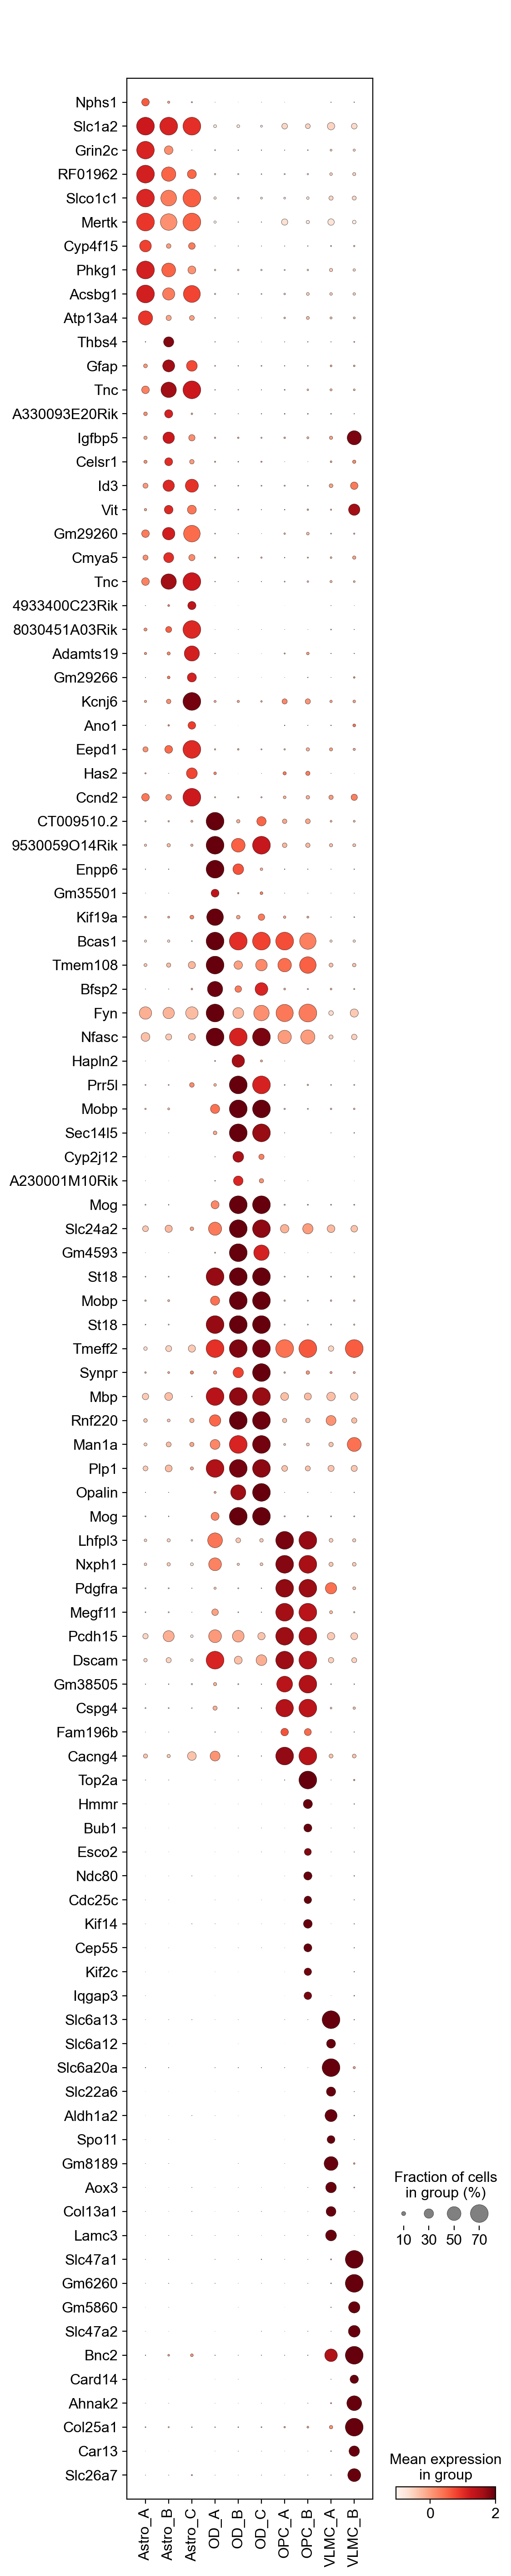

In [198]:
sc.pl.dotplot(adata, ['Nphs1', 'Slc1a2', 'Grin2c', 'RF01962', 'Slco1c1', 'Mertk', 'Cyp4f15',
       'Phkg1', 'Acsbg1', 'Atp13a4', 
                     'Thbs4', 'Gfap', 'Tnc', 'A330093E20Rik', 'Igfbp5', 'Celsr1', 'Id3',
       'Vit', 'Gm29260', 'Cmya5', 
                     'Tnc', '4933400C23Rik', '8030451A03Rik', 'Adamts19', 'Gm29266', 'Kcnj6',
       'Ano1', 'Eepd1', 'Has2', 'Ccnd2', 
                     'CT009510.2', '9530059O14Rik', 'Enpp6', 'Gm35501', 'Kif19a', 'Bcas1',
       'Tmem108', 'Bfsp2', 'Fyn', 'Nfasc',
                     'Hapln2', 'Prr5l', 'Mobp', 'Sec14l5', 'Cyp2j12', 'A230001M10Rik', 'Mog',
       'Slc24a2', 'Gm4593', 'St18',
                    'Mobp', 'St18', 'Tmeff2', 'Synpr', 'Mbp', 'Rnf220', 'Man1a', 'Plp1',
       'Opalin', 'Mog',
                     'Lhfpl3', 'Nxph1', 'Pdgfra', 'Megf11', 'Pcdh15', 'Dscam', 'Gm38505',
       'Cspg4', 'Fam196b', 'Cacng4',
                     'Top2a', 'Hmmr', 'Bub1', 'Esco2', 'Ndc80', 'Cdc25c', 'Kif14', 'Cep55',
       'Kif2c', 'Iqgap3',
                     'Slc6a13', 'Slc6a12', 'Slc6a20a', 'Slc22a6', 'Aldh1a2', 'Spo11',
       'Gm8189', 'Aox3', 'Col13a1', 'Lamc3',
                     'Slc47a1', 'Gm6260', 'Gm5860', 'Slc47a2', 'Bnc2', 'Card14', 'Ahnak2',
       'Col25a1', 'Car13', 'Slc26a7'], 
              categories_order = adata.obs.Type.values.categories,
              groupby='Type',swap_axes=True, use_raw=False, vmax=2, dot_max=0.7)
              #save='L4_type_markersS6.pdf')

In [205]:
print(DE(adata=adata, obs_id='Type', 
             obs_id_test = 'OPC_A', ref='OPC_B')[0:10].index)

Index(['6030407O03Rik', 'Gjc3', 'Ptprn', 'Abca1', 'Neu4', 'Bcas1', 'Col11a2',
       'Kdm5b', 'Crebrf', 'C1ql1'],
      dtype='object')


In [8]:
from matplotlib.colors import ListedColormap
mapcol = ListedColormap(sns.color_palette('light:#a31fe7', n_colors=100).as_hex())


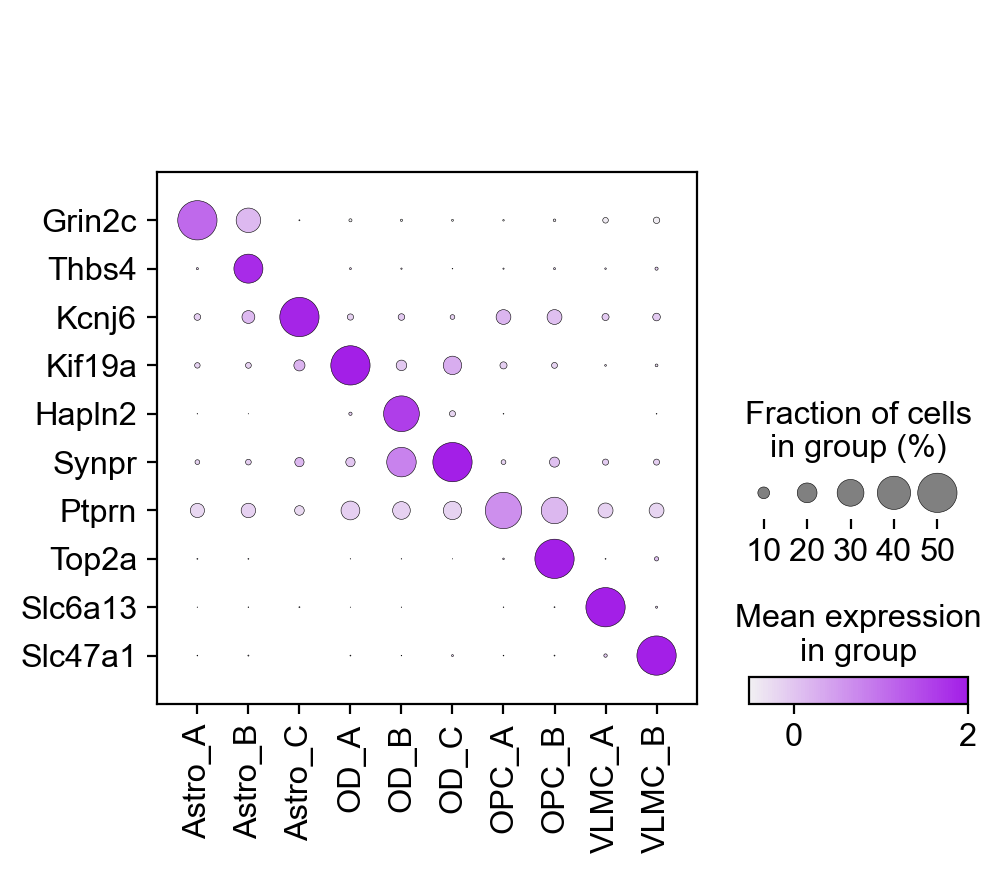

In [14]:
sc.pl.dotplot(adata, ['Grin2c', 'Thbs4', 'Kcnj6', 'Kif19a', 'Hapln2', 'Synpr', 
                      'Ptprn',
                      'Top2a', 'Slc6a13', 'Slc47a1'], 
              categories_order = adata.obs.Type.values.categories,
              groupby='Type',swap_axes=True, use_raw=False, vmax=2, dot_max=0.50,
              cmap=mapcol,
              save='Non-neurons_type_markersS6.pdf')

# DR/DL

In [4]:

P28_dr = sc.read_h5ad(in_path + 'P28' + '_non_analyzed_DR.h5ad')
P38_dr = sc.read_h5ad(in_path + 'P38' + '_non_analyzed_DR.h5ad')
P28_dl = sc.read_h5ad(in_path + 'P28' + '_non_analyzed_DL.h5ad')

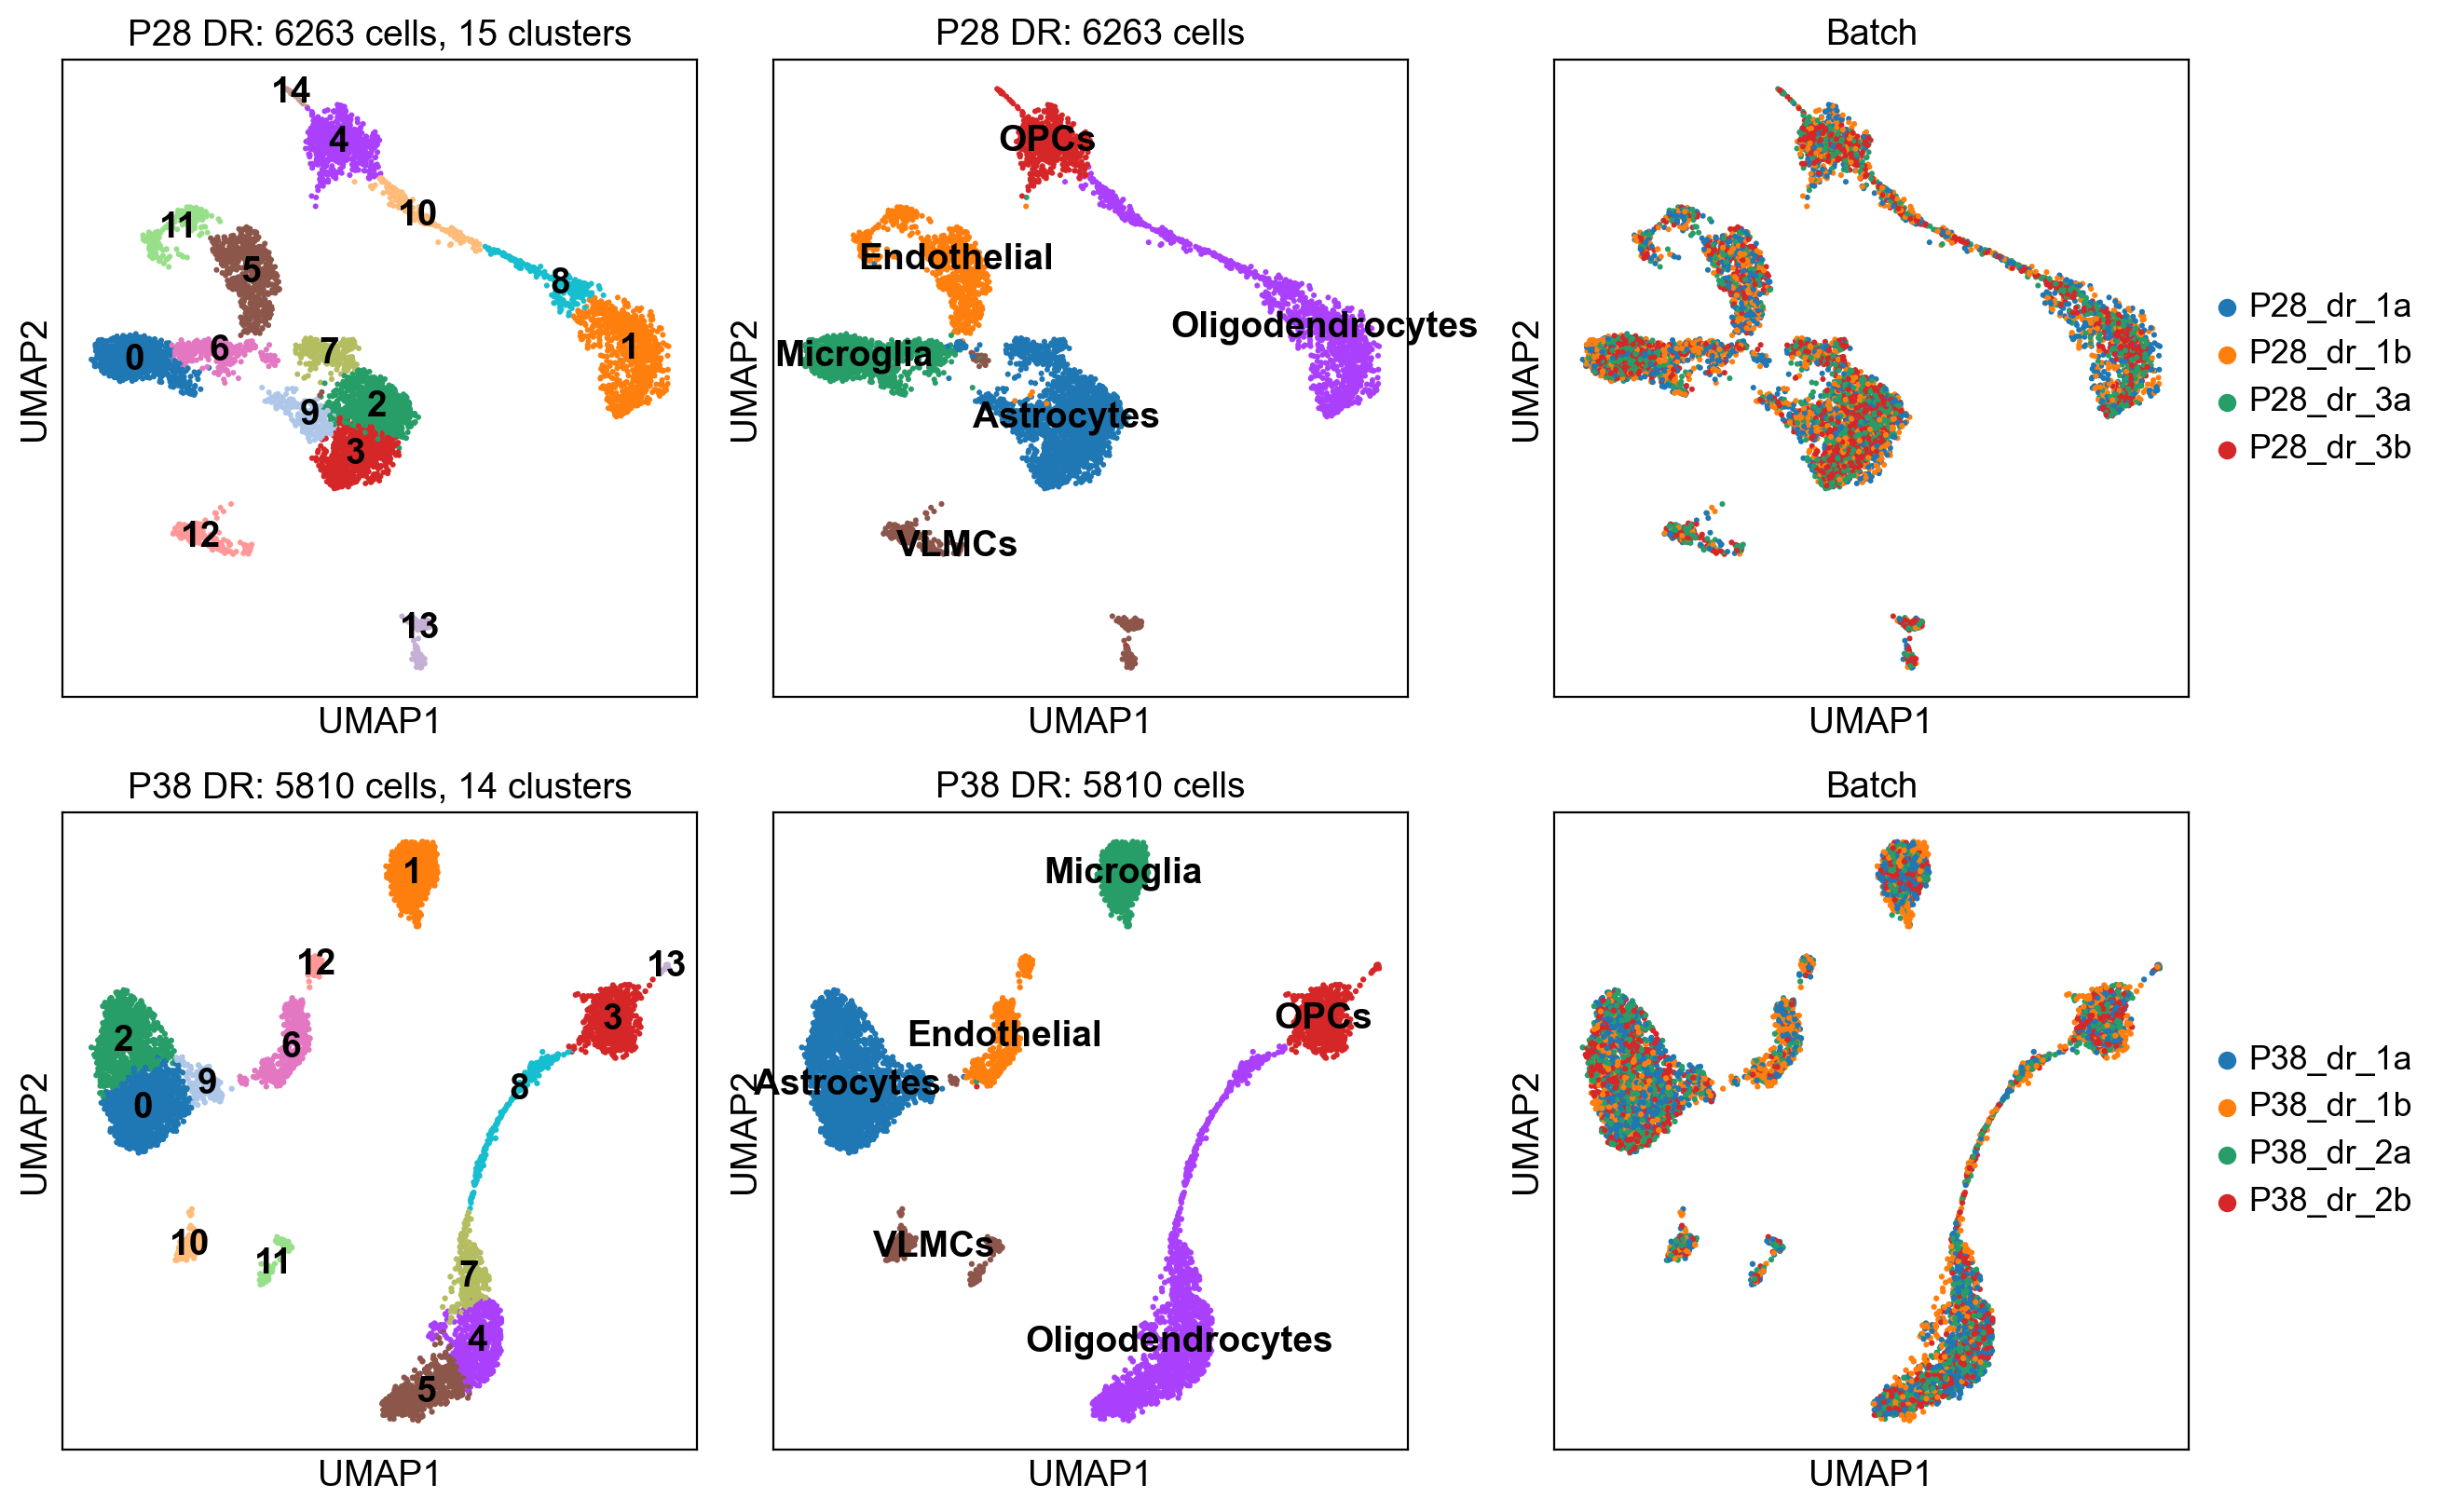

In [9]:
fig, axs = plt.subplots(2, 3, figsize = (13,8), constrained_layout=True)

age_idx = 0
column_idx = 0 
for obj in [P28_dr, P38_dr]:

    sc.pl.umap(obj, color='leiden', ax=axs[age_idx,column_idx], show=False, 
               title= str(obj.obs.batch[0]) + ' DR: ' + str(obj.shape[0]) + ' cells, ' + str(len(obj.obs.leiden.values.categories)) + ' clusters', 
               legend_loc='on data')
    column_idx = column_idx + 1
    
    sc.pl.umap(obj, color='Class_broad', ax=axs[age_idx,column_idx], show=False, 
               title= str(obj.obs.batch[0]) + ' DR: ' + str(obj.shape[0]) + ' cells', legend_loc='on data')
    column_idx = column_idx + 1

    sc.pl.umap(shuffle(obj), color='sample', ax=axs[age_idx,column_idx], show=False, title='Batch')

    column_idx = column_idx + 1

    if (column_idx>=2): 
        age_idx = age_idx + 1
        column_idx = 0

<AxesSubplot:title={'center':'Batch'}, xlabel='UMAP1', ylabel='UMAP2'>

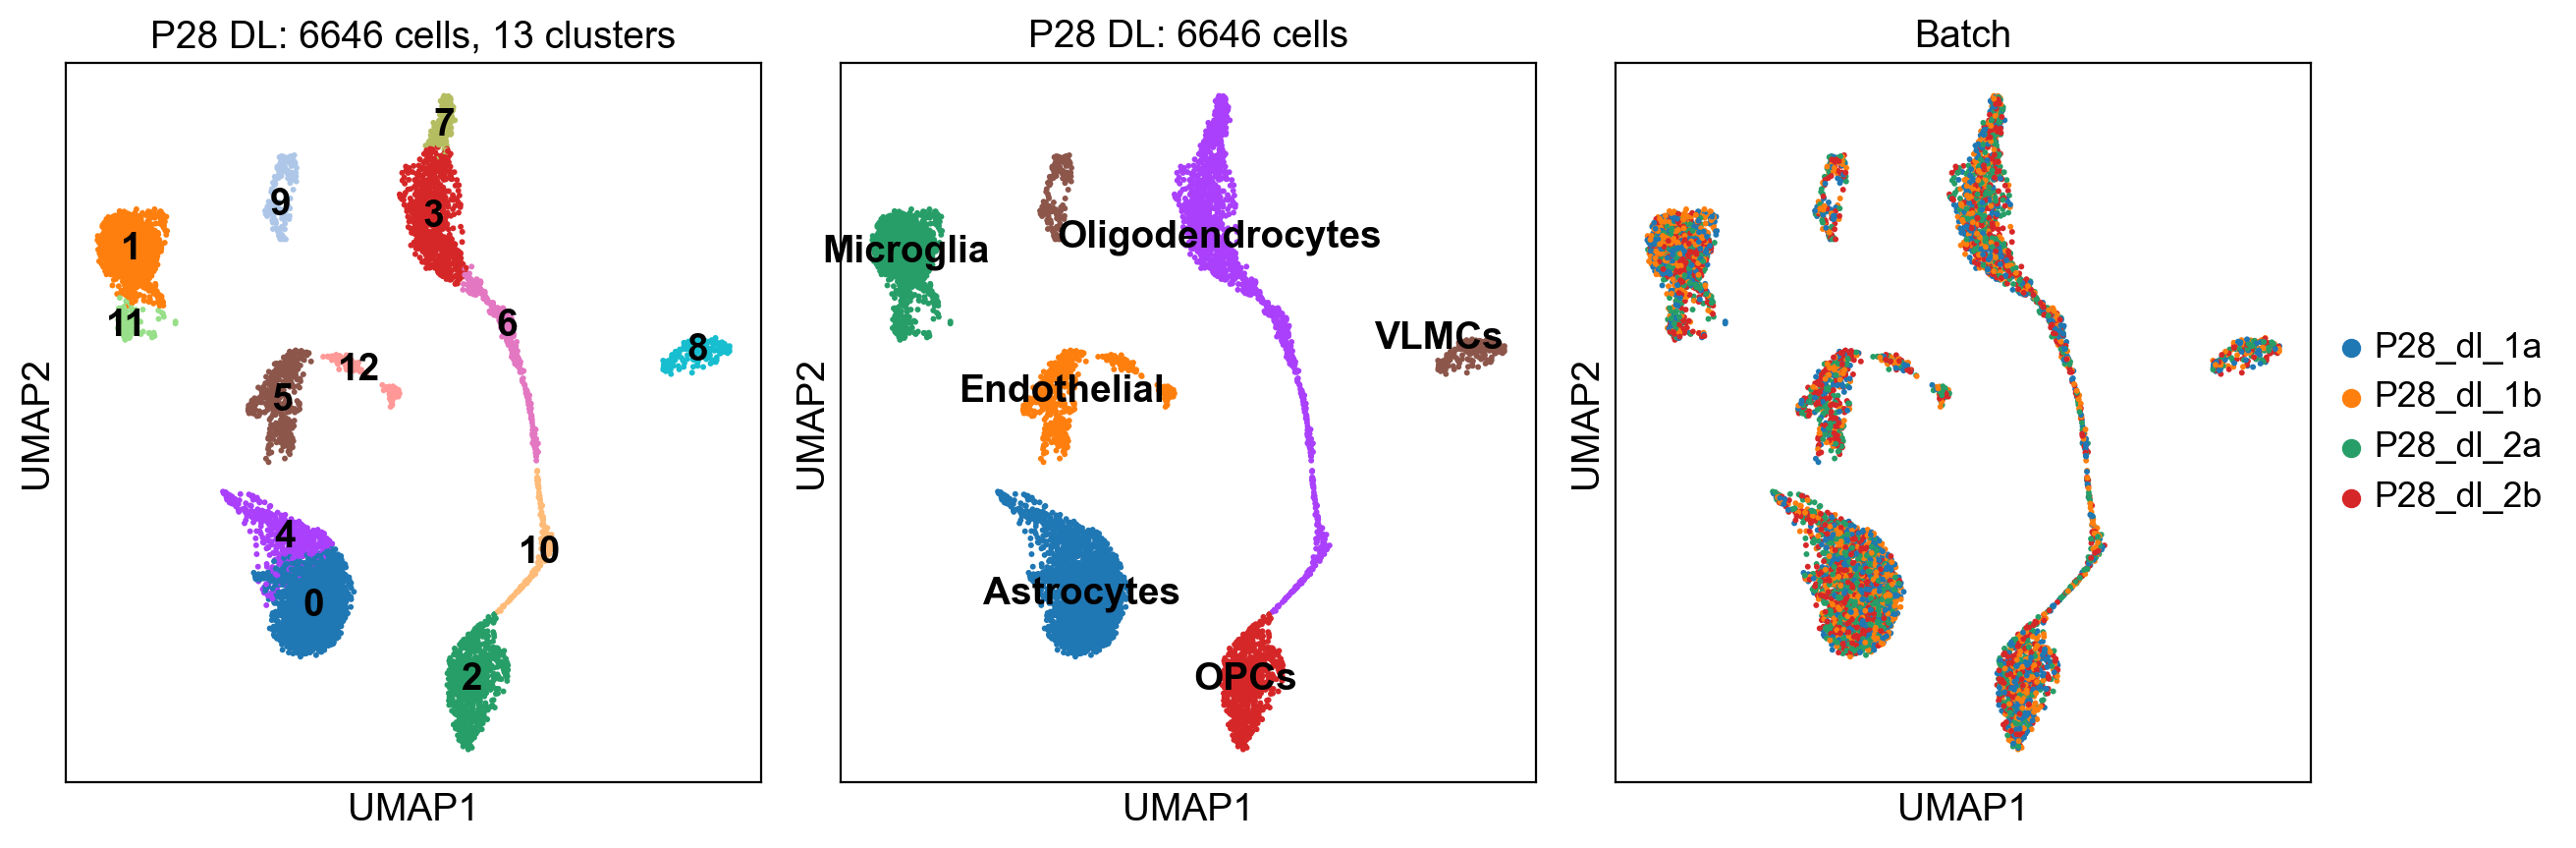

In [11]:
fig, axs = plt.subplots(1, 3, figsize = (13,4.2), constrained_layout=True)

obj = P28_dl

sc.pl.umap(obj, color='leiden', ax=axs[0], show=False, 
           title= 'P28' + ' DL: ' + str(obj.shape[0]) + ' cells, ' + str(len(obj.obs.leiden.values.categories)) + ' clusters', 
           legend_loc='on data')

sc.pl.umap(obj, color='Class_broad', ax=axs[1], show=False, 
           title= 'P28' + ' DL: ' + str(obj.shape[0]) + ' cells', legend_loc='on data')

sc.pl.umap(shuffle(obj), color='batch', ax=axs[2], show=False, title='Batch')

## Name types

### P28DR

In [5]:
type_markers = ['Grin2c', 'Thbs4', 'Kcnj6', 'Kif19a', 'Hapln2', 'Synpr', 
                      'Ptprn',
                      'Top2a', 'Slc6a13', 'Slc47a1']

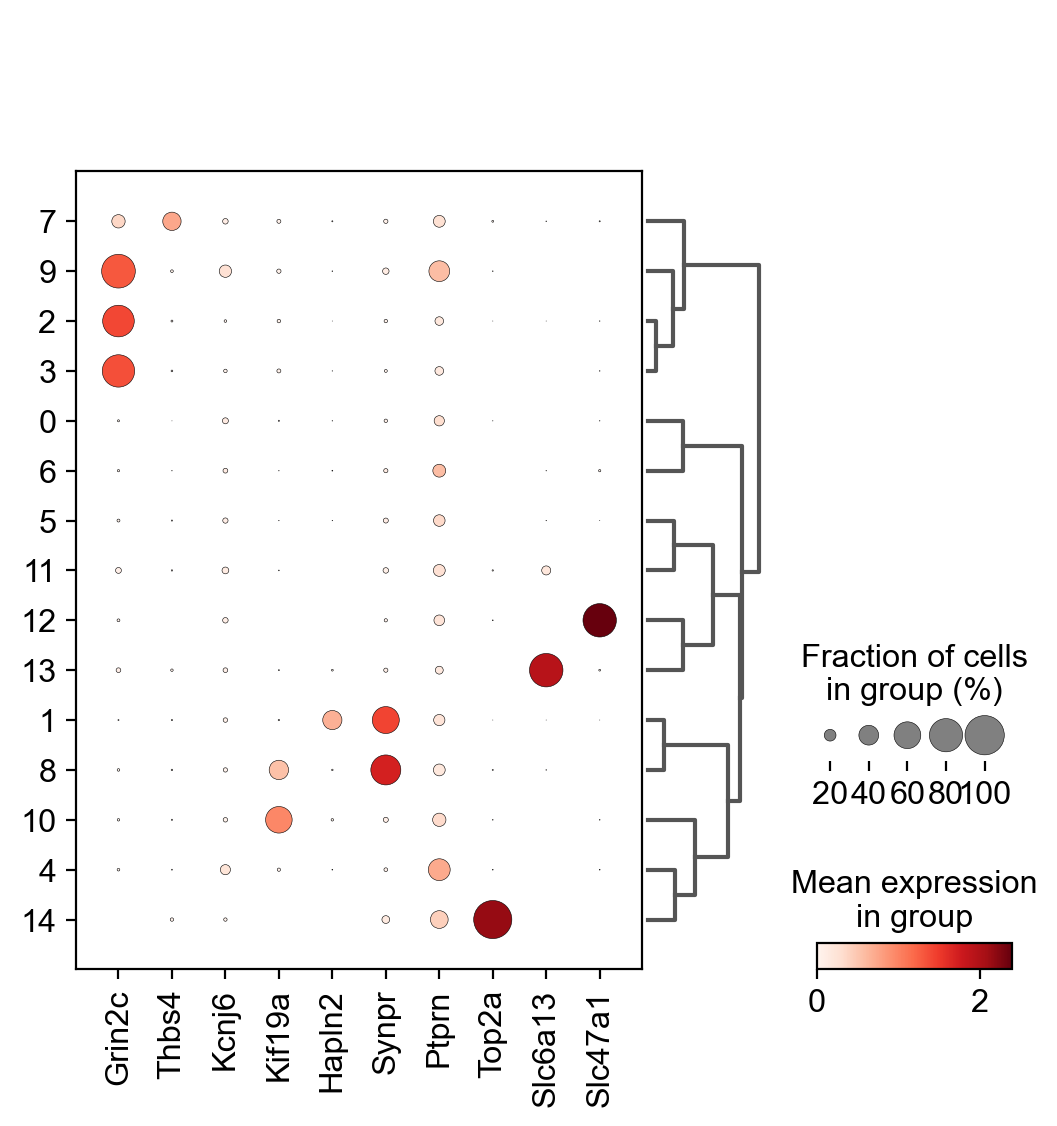

In [6]:
sc.pl.dotplot(P28_dr, var_names=type_markers, groupby='leiden', dendrogram=True)

In [7]:
P28_dr.obs.leiden.values.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'],
      dtype='object')

Type = ['0:Micro', '1:OD_B', '2:Astro_A', '3:Astro_A', '4:OPC_A', '5:Endo', '6:Micro', '7:Astro_B', '8:OD_C', 
        '9:Astro_A', '10:OD_A', '11:Endo', '12:VLMC_B', '13:VLMC_A', '14:OPC_B']

P28_dr.obs['Type'] = P28_dr.obs['leiden']
a = P28_dr.obs['Type']
P28_dr.obs['Type'] = a.cat.rename_categories(Type).values

... storing 'Subclass' as categorical


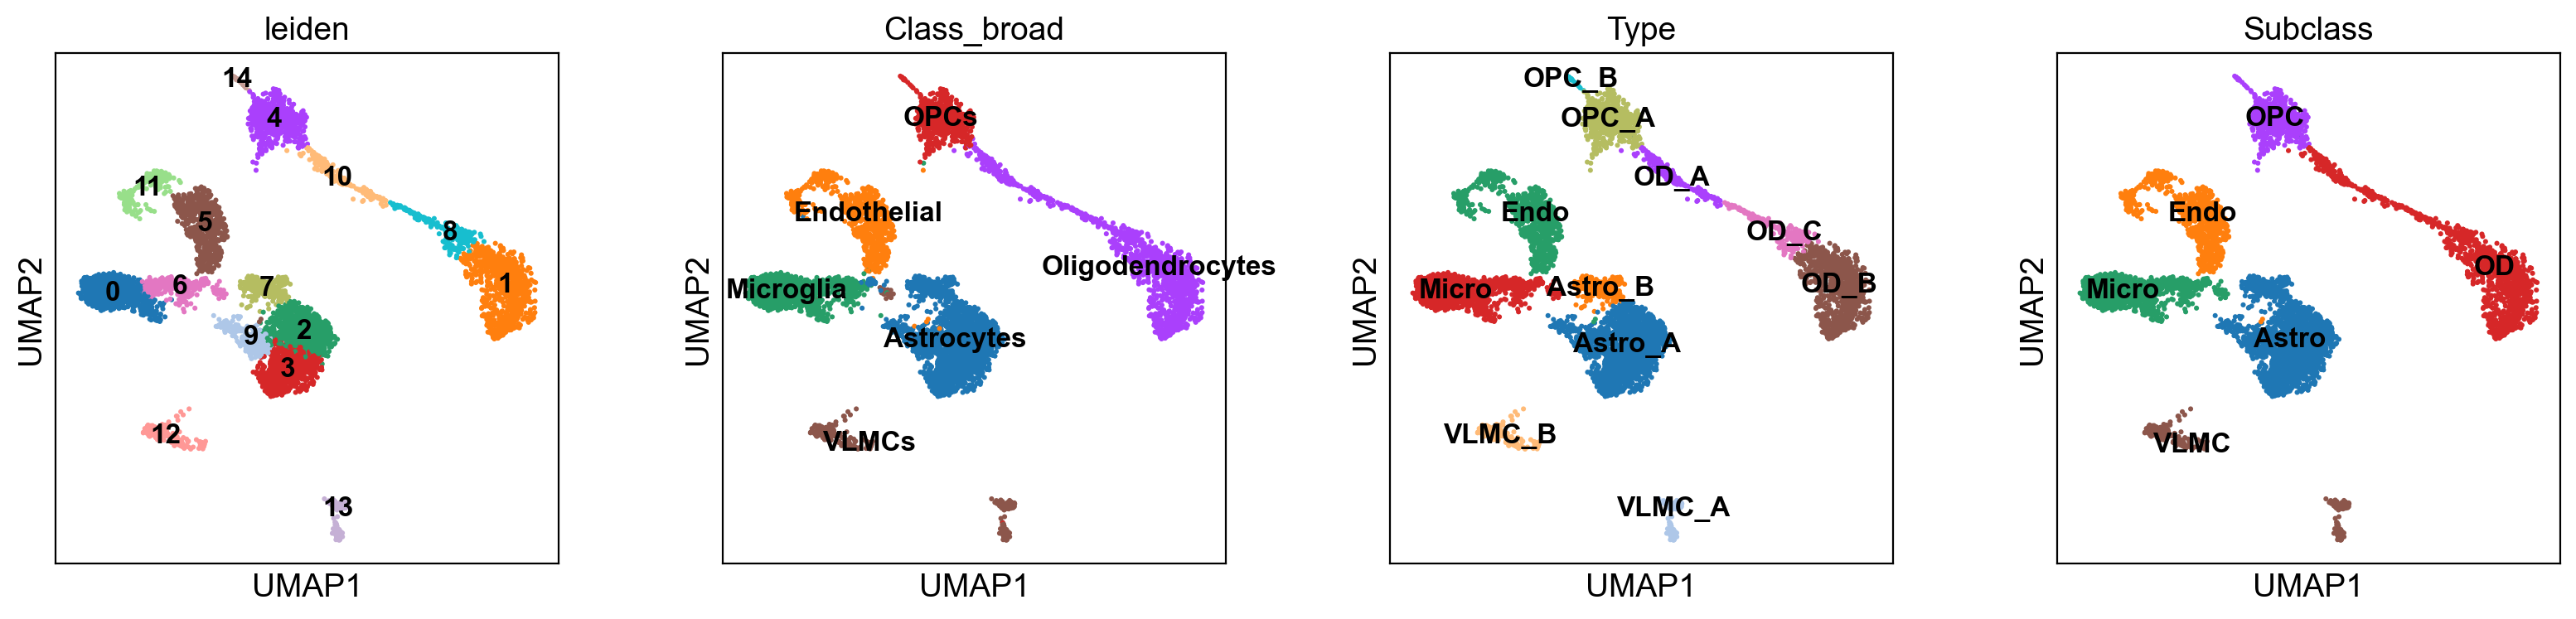

In [12]:
typesP28_dr = []
for i in P28_dr.obs.leiden:
    
    if int(i) in (2, 3, 9): typesP28_dr.append('Astro_A')
        
    elif int(i) in (7,2000): typesP28_dr.append('Astro_B')
        
    elif int(i) in (5,11): typesP28_dr.append('Endo')
        
    elif int(i) in (0,6): typesP28_dr.append('Micro')
        
    elif int(i) in (4,2000): typesP28_dr.append('OPC_A')
        
    elif int(i) in (14,1000): typesP28_dr.append('OPC_B')

    elif int(i) in (10,3000): typesP28_dr.append('OD_A')

    elif int(i) in (1,5000): typesP28_dr.append('OD_B')
        
    elif int(i) in (8,6000): typesP28_dr.append('OD_C')
        
    elif int(i) in (13,10000): typesP28_dr.append('VLMC_A')    
        
    elif int(i) in (12, 1200): typesP28_dr.append('VLMC_B')    


P28_dr.obs['Type'] = pd.Categorical(typesP28_dr)

P28_dr.obs['Subclass'] = P28_dr.obs['Type']
P28_dr.obs['Subclass'] = P28_dr.obs['Subclass'].str.replace('_A','')
P28_dr.obs['Subclass'] = P28_dr.obs['Subclass'].str.replace('_B','')
P28_dr.obs['Subclass'] = P28_dr.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P28_dr, color=['leiden', 'Class_broad', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

### P38DR

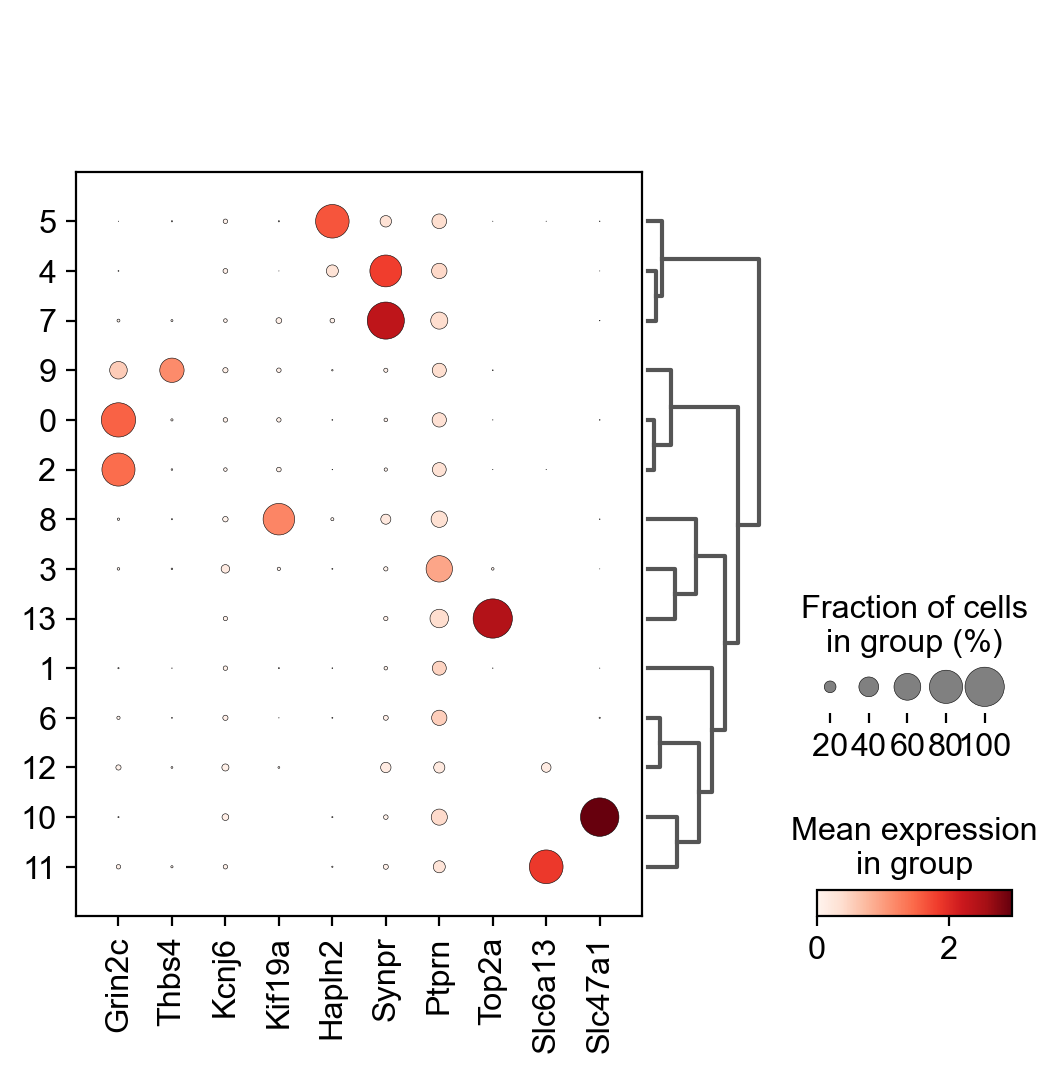

In [14]:
sc.pl.dotplot(P38_dr, var_names=type_markers, groupby='leiden', dendrogram=True)

In [16]:
P38_dr.obs.leiden.values.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')

In [ ]:
['0:Astro_A', '1:Micro', '2:Astro_A', '3:OPC_A', '4:OD_B', '5:OD_B', '6:Endo', '7:OD_C', '8:OD_A', 
 '9:Astro_B', '10:VLMC_B', '11:VLMC_A', '12:Endo', '13:OPC_B']

... storing 'Subclass' as categorical


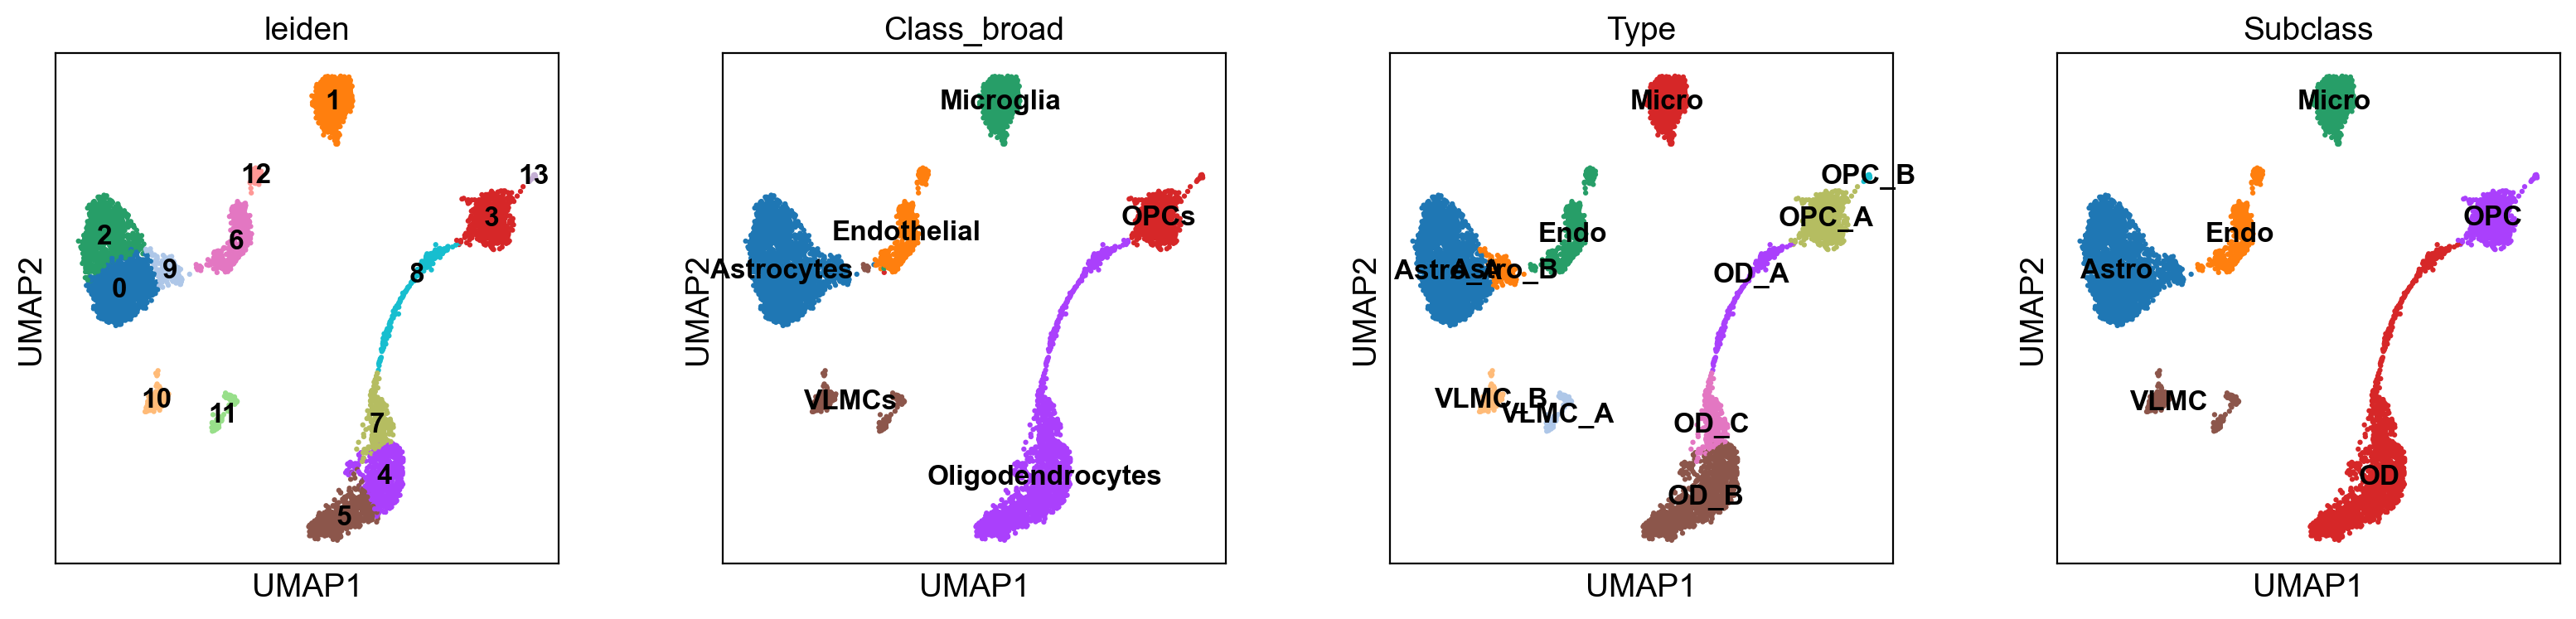

In [17]:
typesP38_dr = []
for i in P38_dr.obs.leiden:
    
    if int(i) in (0,2): typesP38_dr.append('Astro_A')
        
    elif int(i) in (9,2000): typesP38_dr.append('Astro_B')
        
    elif int(i) in (6,12): typesP38_dr.append('Endo')
        
    elif int(i) in (1, 1000): typesP38_dr.append('Micro')
        
    elif int(i) in (3,2000): typesP38_dr.append('OPC_A')
        
    elif int(i) in (13,1000): typesP38_dr.append('OPC_B')

    elif int(i) in (8,3000): typesP38_dr.append('OD_A')

    elif int(i) in (4,5): typesP38_dr.append('OD_B')
        
    elif int(i) in (7,6000): typesP38_dr.append('OD_C')
        
    elif int(i) in (11,10000): typesP38_dr.append('VLMC_A')    
        
    elif int(i) in (10, 1200): typesP38_dr.append('VLMC_B')    


P38_dr.obs['Type'] = pd.Categorical(typesP38_dr)

P38_dr.obs['Subclass'] = P38_dr.obs['Type']
P38_dr.obs['Subclass'] = P38_dr.obs['Subclass'].str.replace('_A','')
P38_dr.obs['Subclass'] = P38_dr.obs['Subclass'].str.replace('_B','')
P38_dr.obs['Subclass'] = P38_dr.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P38_dr, color=['leiden', 'Class_broad', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

### P28DL

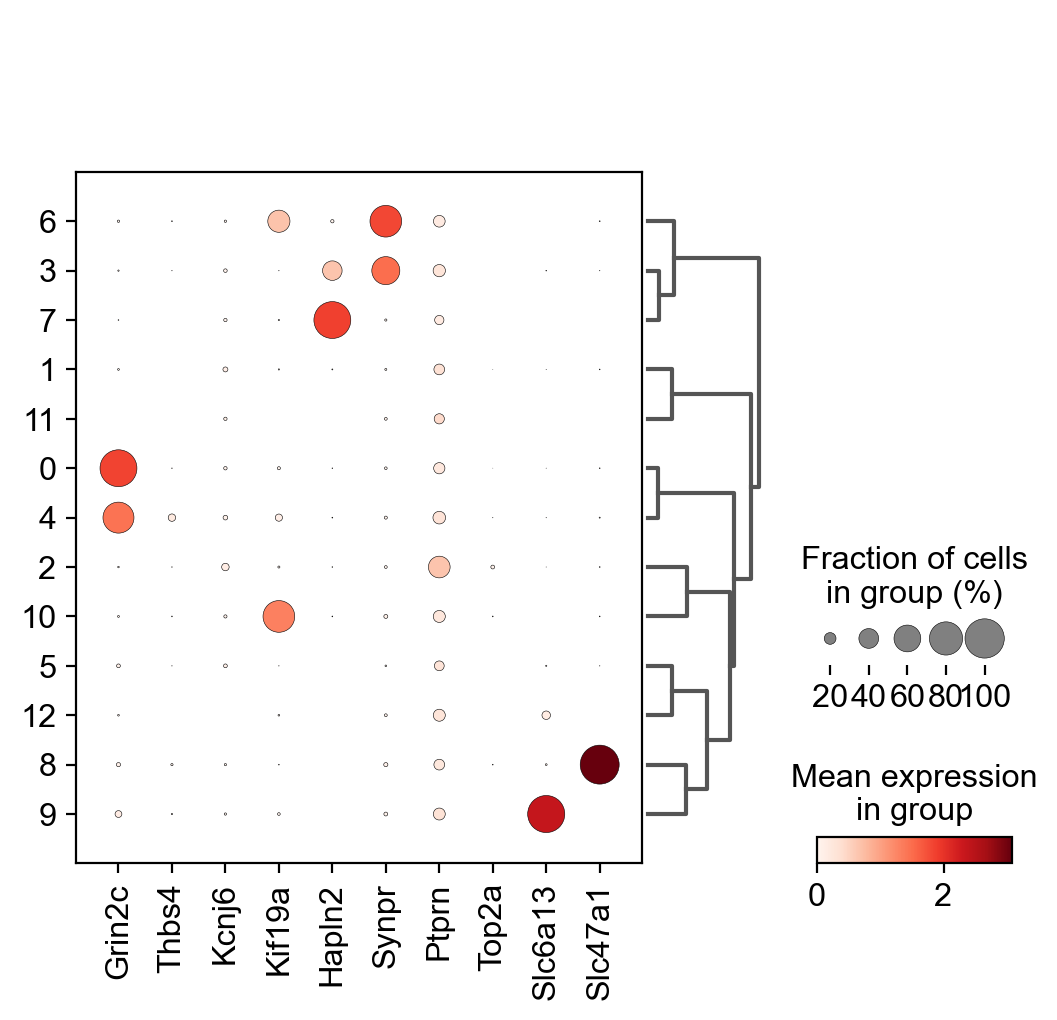

In [18]:
sc.pl.dotplot(P28_dl, var_names=type_markers, groupby='leiden', dendrogram=True)

In [19]:
P28_dl.obs.leiden.values.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [ ]:
['0:Astro_A', '1:Micro', '2:OPC_A', '3:OD_B', '4:Astro_B', 
 '5:Endo', '6:OD_C', '7:OD_B', '8:VLMC_B', 
 '9:VLMC_A', '10:OD_A', '11:Micro', '12:Endo']

... storing 'Subclass' as categorical


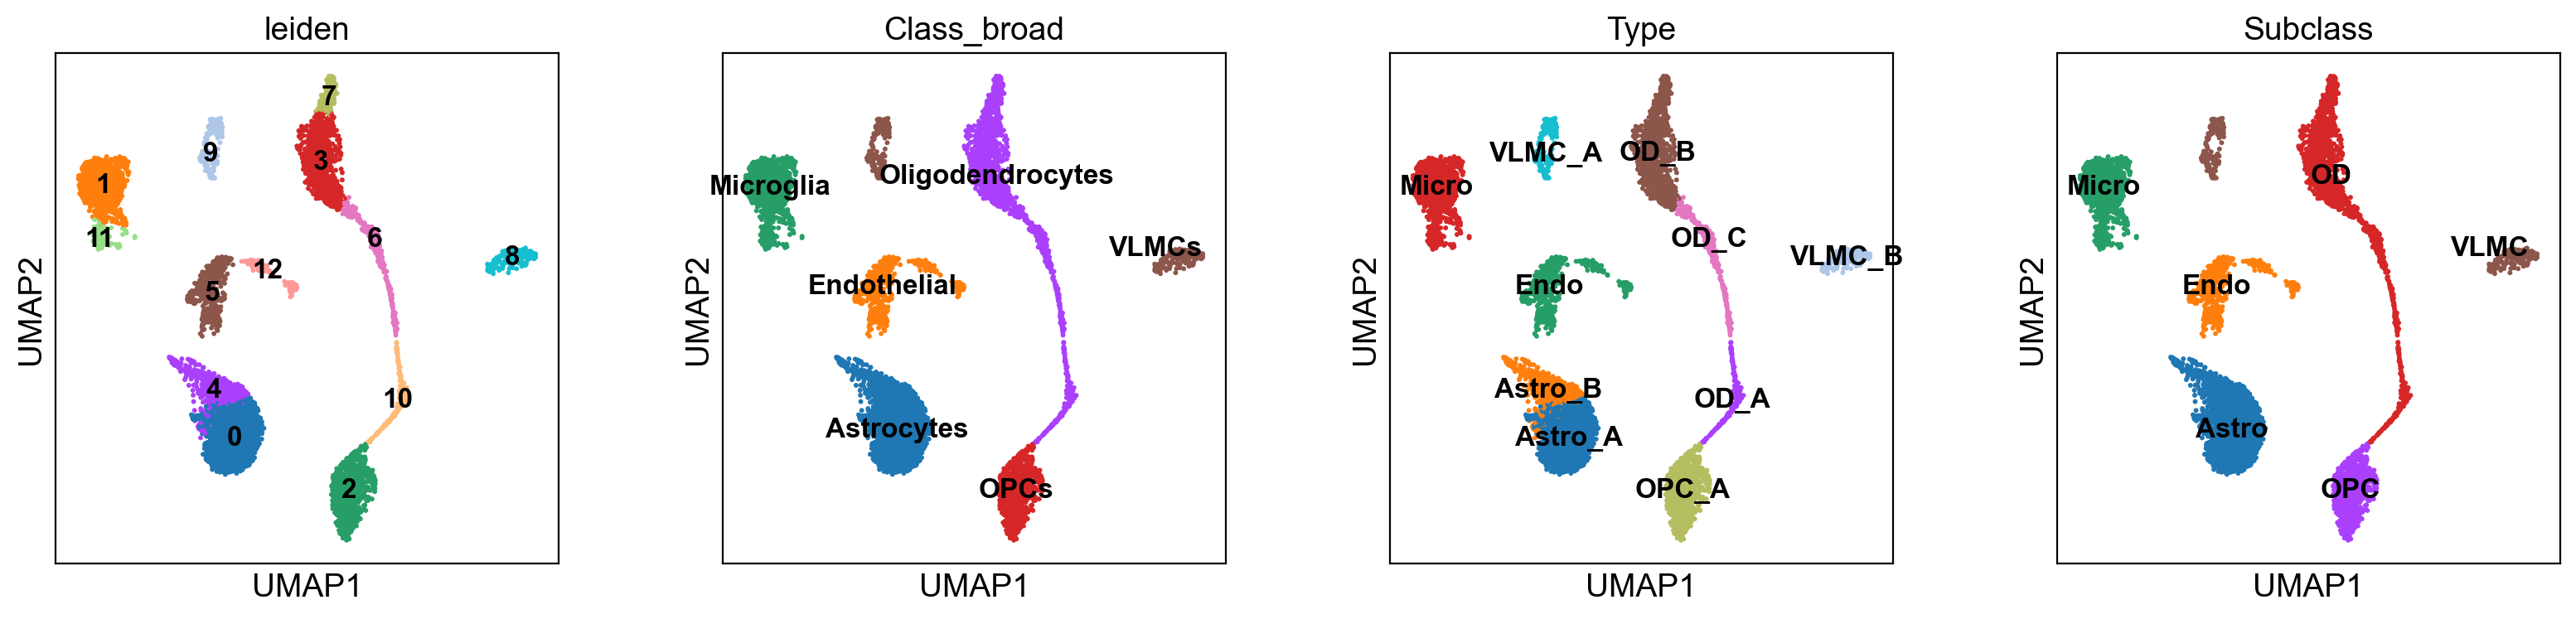

In [20]:
typesP28_dl = []
for i in P28_dl.obs.leiden:
    
    if int(i) in (0,1300): typesP28_dl.append('Astro_A')
        
    elif int(i) in (4,2000): typesP28_dl.append('Astro_B')
        
    elif int(i) in (5,12): typesP28_dl.append('Endo')
        
    elif int(i) in (1, 11): typesP28_dl.append('Micro')
        
    elif int(i) in (2,2000): typesP28_dl.append('OPC_A')
        
    #elif int(i) in (): typesP28_dl.append('OPC_B')

    elif int(i) in (10,3000): typesP28_dl.append('OD_A')

    elif int(i) in (3,7): typesP28_dl.append('OD_B')
        
    elif int(i) in (6,6000): typesP28_dl.append('OD_C')
        
    elif int(i) in (9,10000): typesP28_dl.append('VLMC_A')    
        
    elif int(i) in (8, 1200): typesP28_dl.append('VLMC_B')    


P28_dl.obs['Type'] = pd.Categorical(typesP28_dl)

P28_dl.obs['Subclass'] = P28_dl.obs['Type']
P28_dl.obs['Subclass'] = P28_dl.obs['Subclass'].str.replace('_A','')
P28_dl.obs['Subclass'] = P28_dl.obs['Subclass'].str.replace('_B','')
P28_dl.obs['Subclass'] = P28_dl.obs['Subclass'].str.replace('_C','')

sc.pl.umap(P28_dl, color=['leiden', 'Class_broad', 'Type', 'Subclass'], legend_loc='on data', legend_fontsize=12)

## Output objs for mappings

In [21]:

for i in [P28_dr, P38_dr]: i.write_h5ad(out_path + i.obs.batch[0] + '_non_analyzed_DR.h5ad')

In [22]:

P28_dl.write_h5ad(out_path + 'P28' + '_non_analyzed_DL.h5ad')

# Tuning cluster resolution

## Prep objs

In [10]:
for i in nons:
    sc.pp.neighbors(i, n_neighbors=25, use_rep='X_harmony')
    sc.tl.leiden(i)
    sc.tl.umap(i)

## Compute and plot

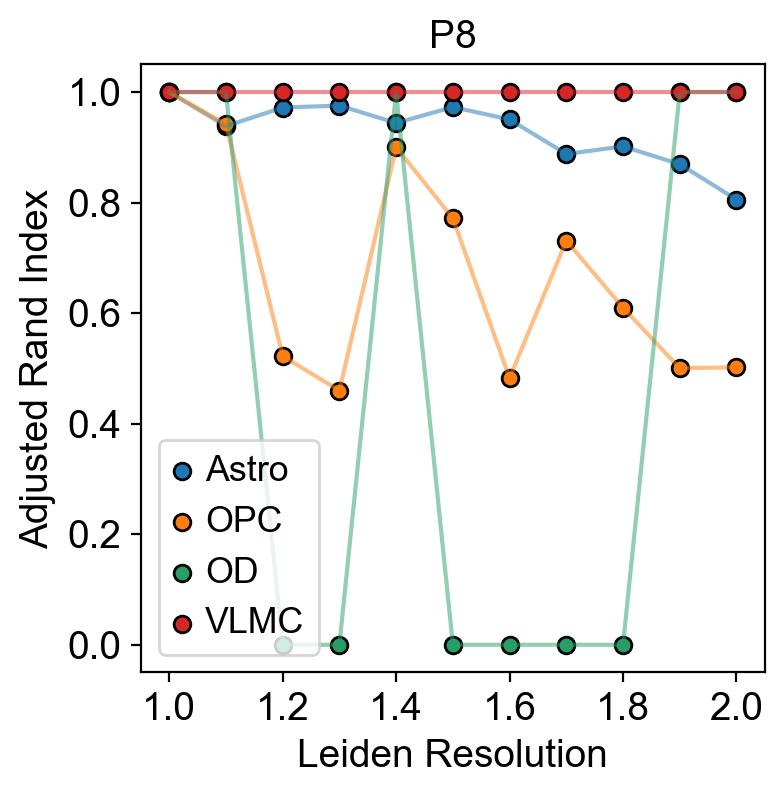

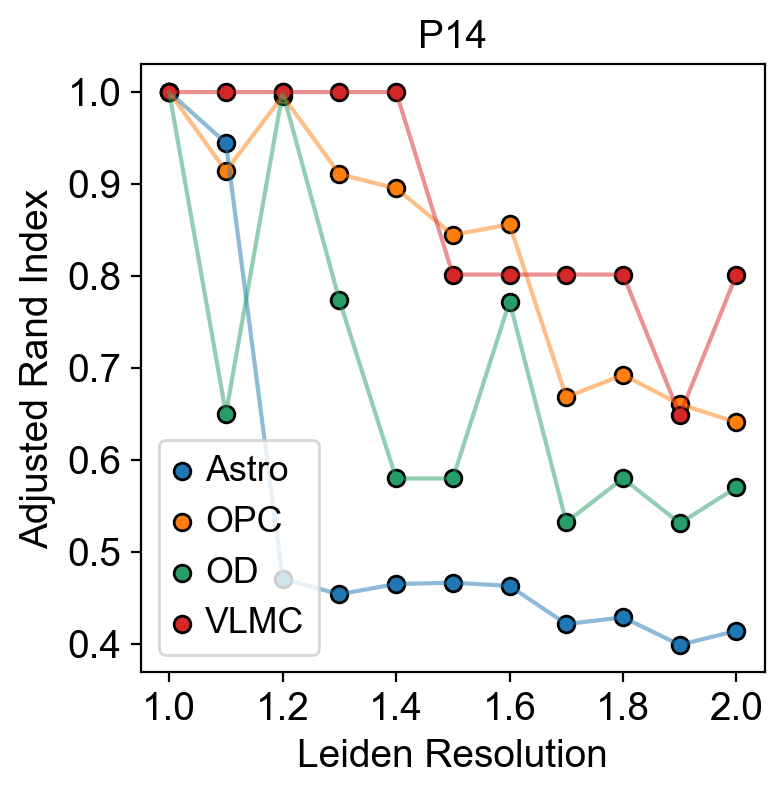

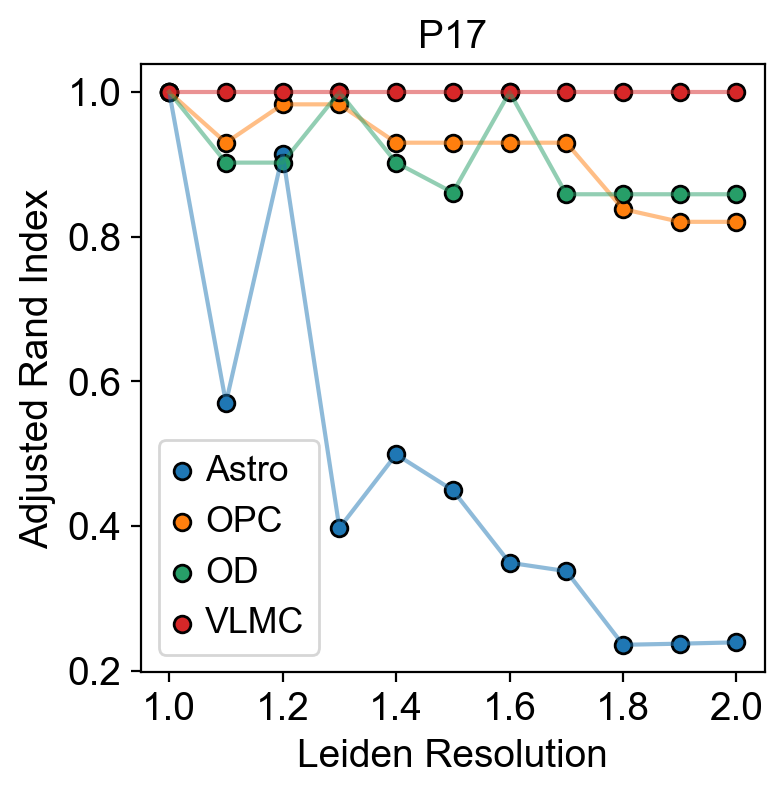

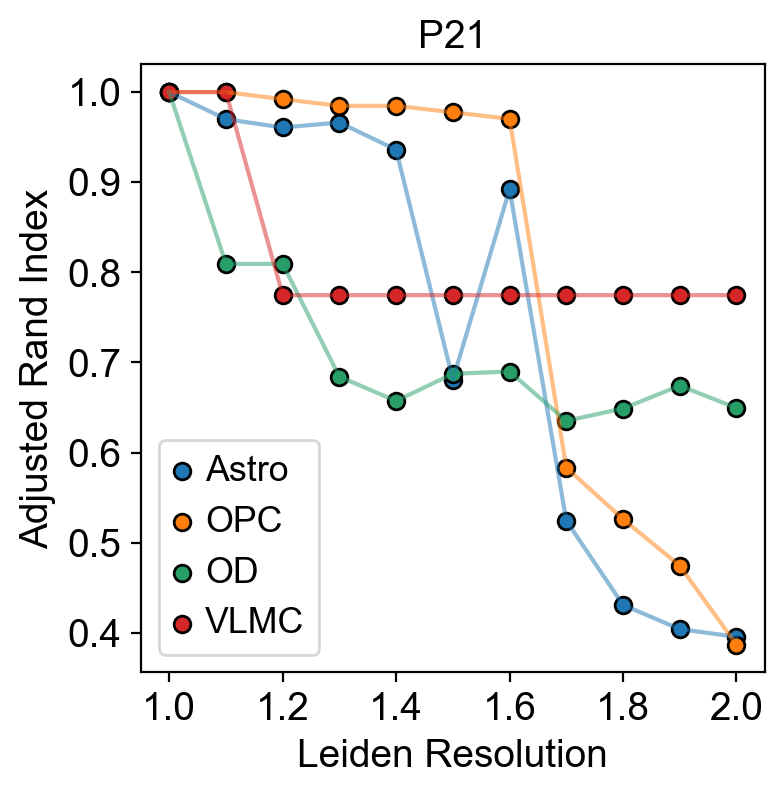

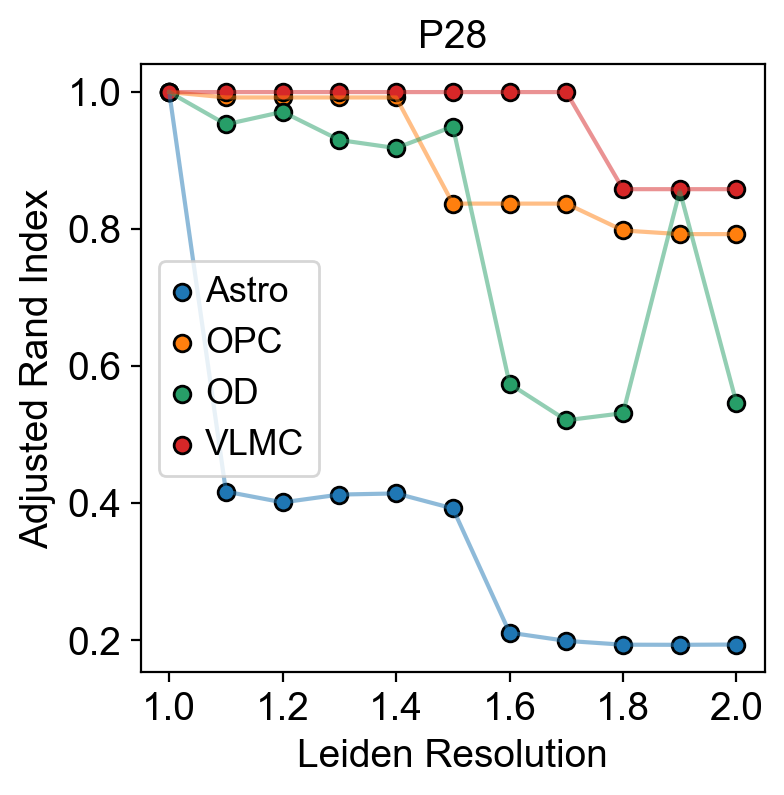

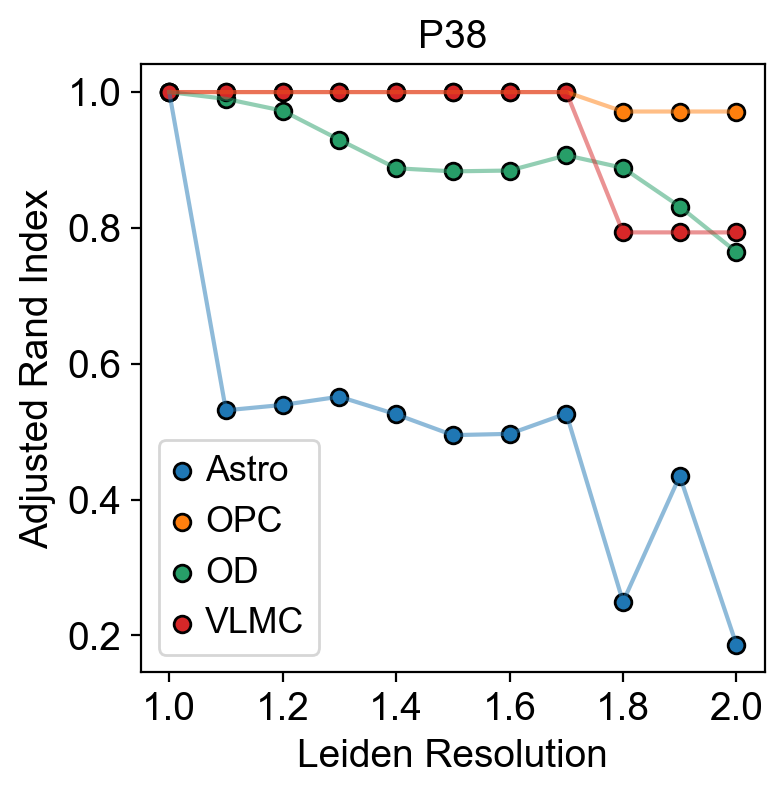

In [11]:
x = np.arange(1,2.1, 0.1)
ARIs_master = []

for obj in nons:
    adata = obj

    def_res_leiden_as = (list(adata[adata.obs.Subclass=='Astro',:].obs.leiden.values))
    def_res_leiden_opc = (list(adata[adata.obs.Subclass=='OPC',:].obs.leiden.values))
    def_res_leiden_od = (list(adata[adata.obs.Subclass=='OD',:].obs.leiden.values))
    def_res_leiden_vlmc = (list(adata[adata.obs.Subclass=='VLMC',:].obs.leiden.values))

    ARI_as = []
    ARI_opc = []
    ARI_od = []
    ARI_vlmc = []



    for res in x:
        sc.tl.leiden(adata, resolution=res)
        #fig, axs = plt.subplots(1, 3, figsize = (13.5,4), constrained_layout=True)
        #sc.pl.umap(adata, color='Type', legend_fontsize='10', ax=axs[0],
        #           show=False, title=adata.obs.Age[0]+ ' : ' + str(adata.shape[0]) + ' cells', frameon=True, legend_loc='on data')
        #sc.pl.umap(adata, color='leiden', ax=axs[1], show=False, title= adata.obs.Age[0]+' Leiden: ' + str(res) + ' res', legend_loc='on data')
        #sc.pl.umap(adata, color='sample', ax=axs[2], show=False, title=adata.obs.Age[0]+' : ' + str(adata.shape[0]) + ' cells')
        ARI_as.append(adjusted_rand_score(def_res_leiden_as, (list(adata[adata.obs.Subclass=='Astro',:].obs.leiden.values))))
        ARI_opc.append(adjusted_rand_score(def_res_leiden_opc, (list(adata[adata.obs.Subclass=='OPC',:].obs.leiden.values))))

        ARI_od.append(adjusted_rand_score(def_res_leiden_od, (list(adata[adata.obs.Subclass=='OD',:].obs.leiden.values))))
        ARI_vlmc.append(adjusted_rand_score(def_res_leiden_vlmc, (list(adata[adata.obs.Subclass=='VLMC',:].obs.leiden.values))))

    plt.show()
    
    plt.plot(x, ARI_as, alpha=0.5)
    plt.scatter(x, ARI_as, label='Astro', edgecolor='black')

    plt.plot(x, ARI_opc, alpha=0.5)
    plt.scatter(x, ARI_opc, label='OPC', edgecolor='black')

    plt.plot(x, ARI_od, alpha=0.5)
    plt.scatter(x, ARI_od, label='OD', edgecolor='black' )
    
    plt.plot(x, ARI_vlmc, alpha=0.5)
    plt.scatter(x, ARI_vlmc, label='VLMC', edgecolor='black')


    plt.legend()
    plt.grid(False)
    plt.xlabel('Leiden Resolution')
    plt.ylabel('Adjusted Rand Index')
    plt.xticks(np.arange(1,2.1, 0.2))
    #plt.ylim([0.2, 1.05])
    plt.title(adata.obs.batch[0])
    plt.show()

    
    ARIs_df = pd.DataFrame(np.transpose(np.array([ARI_as, ARI_opc, ARI_od, ARI_vlmc])),
                  columns=['Astro', 'OPC', 'OD', 'VLMC'])
    ARIs_df['res'] = np.arange(1,2.1, 0.1)
    
    ARIs_master.append(ARIs_df)




In [12]:
reses = list(np.arange(1,2.1,0.1)) + list(np.arange(1,2.1,0.1))+list(np.arange(1,2.1,0.1))+list(np.arange(1,2.1,0.1))+list(np.arange(1,2.1,0.1))+list(np.arange(1,2.1,0.1))
reses_ = np.array(np.round(np.array(reses), 3), dtype='str')
ARI_all = pd.concat(ARIs_master)

In [14]:
ARI_all.to_csv('ARIs_clustres_non.csv')

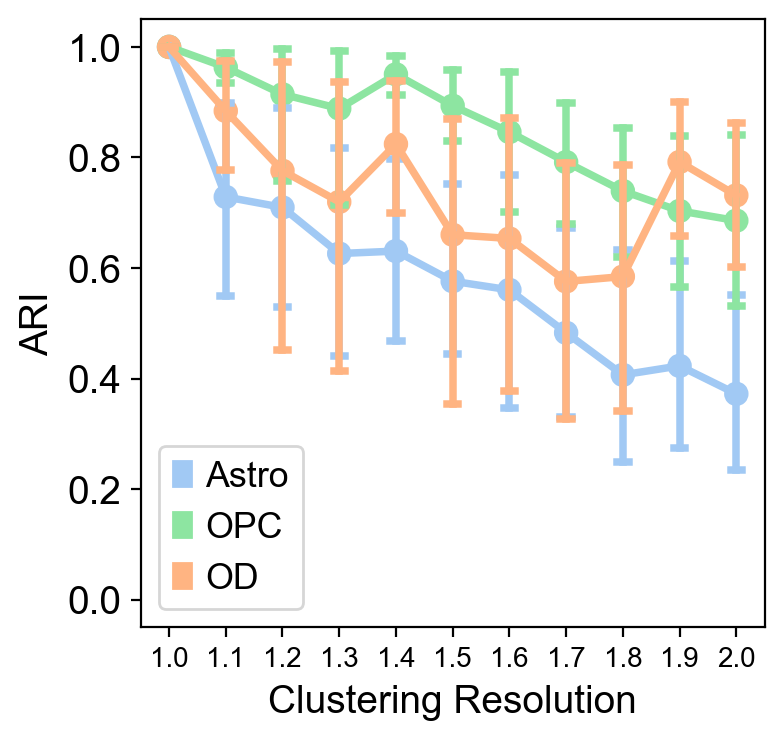

In [16]:
palette = sns.color_palette('pastel').as_hex()[0:6]

sns.pointplot(reses_, y="Astro", data=ARI_all,capsize=.2, color=palette[0], label='Astro')
sns.pointplot(reses_, y="OPC", data=ARI_all,capsize=.2, color=palette[2], label='OPC')
sns.pointplot(reses_, y="OD", data=ARI_all,capsize=.2, color=palette[1], label='OD')
#sns.pointplot(reses_, y="VLMC", data=ARI_all,capsize=.2, color=palette[3], label='VLMC')



plt.grid(False)
plt.ylabel('ARI')
plt.xlabel('Clustering Resolution')
plt.ylim([-0.05,1.05])

import matplotlib.patches as mpatches
pv_patch = mpatches.Patch(color=palette[0], label='Astro')
OPC_patch = mpatches.Patch(color=palette[2], label='OPC')
OD_patch = mpatches.Patch(color=palette[1], label='OD')
#VLMC_patch = mpatches.Patch(color=palette[3], label='VLMC')


plt.legend(handles=[pv_patch, OPC_patch, OD_patch])

plt.xticks(fontsize=10)

plt.savefig('ClustRes_non.pdf')
